# The Goal of Notebook
The goals of this Notebook is to answer on question whether some particular star variable and classify it. THen uild algorithm to investigate stars.

In [1]:
!nvidia-smi
!python --version

/bin/bash: line 1: nvidia-smi: command not found
Python 3.11.11


## 1 Prepare environment

### 1.1 Import astronomical packages
+ `lightkurve` - [library](https://lightkurve.github.io/lightkurve/index.html) library for discovery Kepler and Tess datasets
+ `astropy` - [library](https://www.astropy.org/) designed for astronomy and astrophysics. It provides a comprehensive suite of tools for handling astronomical data, performing scientific computations, and supporting research workflows
+ `astroquery` - [library](https://astroquery.readthedocs.io/en/latest/) with a set of tools for querying astronomical web forms and databases.

### 1.2 Import math and visialization libraries
+ `numpy` - [library](https://numpy.org/) support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
+ `pandas` - [library](https://pandas.pydata.org/) for data manipulation and analytics
+ `maptlotlib` - [library](https://matplotlib.org/) for for visualization static, animated, and interactive visualizations
+ `ffmpeg` - [library](https://www.ffmpeg.org/) for handling video, audio and multimedia files and streams (enable animations in lightkurve)
+ `ipympl` - [library](https://matplotlib.org/ipympl/) for enabling interactive Matplotlib plots directly within Jupyter Notebooks

In [ ]:
import io

# astronomy packages
try:
  import lightkurve as lk
except:
  !pip install lightkurve --upgrade
  import lightkurve as lk

try:
  import astropy as ast
except:
  !pip install astropy --upgrade
  import astropy as ast

import astroquery as aq

# math packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
# %matplotlib widget
# %matplotlib notebook
try:
  import ffmpeg
except:
  !apt-get install -y ffmpeg
try:
  import ipympl
except:
  !pip install ipympl

from IPython.display import display
from IPython.core.display import HTML

# Check versions
print('Lightkurve version: ' + lk.__version__)
print('Astropy version: ' + ast.__version__)
print('Numpy version: ' + np.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('Pandas version: ' + pd.__version__)

## 2 Download datasets for interested starts

### 2.1 Define starts
 * Interested stars are collected in /data/test_vstars_*.csv files. There are their numbers from TESS Input Catalog (TIC)

In [3]:
def append_prefix(df: pd.DataFrame,
                  prefix="TIC "):
  list = []
  for num in df[0]:
      list.append(f"{prefix}{num}")
  return np.array(list)

In [4]:
star_names_50_1_url = "https://raw.githubusercontent.com/serhiikartashov/discovery-astronomic-objects/refs/heads/main/data/tess_vstars_50_1.csv"
star_names_50_2_url = "https://raw.githubusercontent.com/serhiikartashov/discovery-astronomic-objects/refs/heads/main/data/tess_vstars_50_2.csv"
star_names = pd.read_csv(star_names_50_1_url, header=None)

# Convert to a NumPy array
tic_star_names = append_prefix(star_names)

# Print the final array
print(tic_star_names)

['TIC 116986071' 'TIC 1551778142' 'TIC 159332859' 'TIC 187531837'
 'TIC 198183379' 'TIC 219100171' 'TIC 229510866' 'TIC 229704090'
 'TIC 229752721' 'TIC 229937189' 'TIC 230019644' 'TIC 230071306'
 'TIC 230083885' 'TIC 230381054' 'TIC 233745344' 'TIC 237116143'
 'TIC 237201691' 'TIC 237205536' 'TIC 237206223' 'TIC 237213653'
 'TIC 251105281' 'TIC 251333156' 'TIC 252452281' 'TIC 260694891'
 'TIC 263931812' 'TIC 275259749' 'TIC 281482721' 'TIC 288268074'
 'TIC 29221935' 'TIC 315756675' 'TIC 327756689' 'TIC 329351663'
 'TIC 341839700' 'TIC 341871585' 'TIC 351695758' 'TIC 353241568'
 'TIC 353257675' 'TIC 364184518' 'TIC 366873414' 'TIC 376869068'
 'TIC 388565206' 'TIC 392126428' 'TIC 392569693' 'TIC 429059113'
 'TIC 441765151' 'TIC 446041643' 'TIC 467835395' 'TIC 82243350'
 'TIC 85855399' 'TIC 94541786']


### 2.2 Collect datasets
 * find lightcurves for selected starts

In [5]:
from tqdm.auto import tqdm

def search_and_download_lightcurves(targets: list[str],
                       sector: int,
                       mission="TESS"):
  lc_list = []
  for target in tqdm(targets):
    lc_list.append(lk.search_lightcurve(target=target, sector=sector, mission=mission).download());
  return lc_list;

def search_lightcurves(targets: list[str],
                       sector: int,
                       mission="TESS"):
  lc_list = []
  for target in tqdm(targets):
    lc_list.append(lk.search_lightcurve(target=target, sector=sector, mission=mission));
  return lc_list;

In [15]:
lc_datasets = search_and_download_lightcurves(tic_star_names, 86, "TESS");

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 file

## 3 Plot lightcurves for selected stars (optional)
 * these lightcurves use Ulian Calendar and mmag for X and Y.

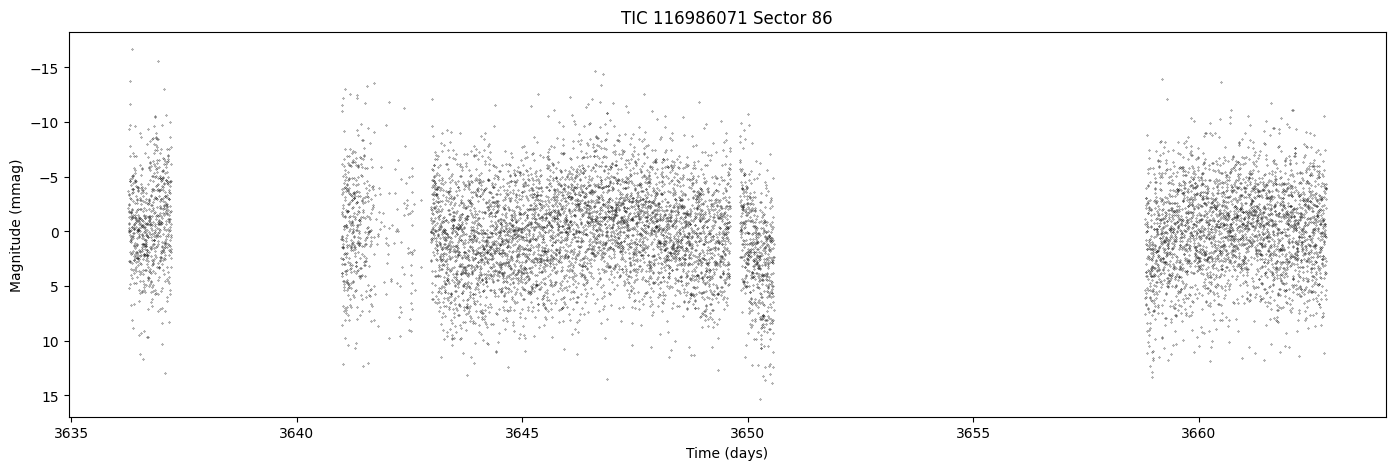

/usr/local/lib/python3.11/dist-packages/astropy/utils/masked/core.py:848: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*unmasked, **kwargs)


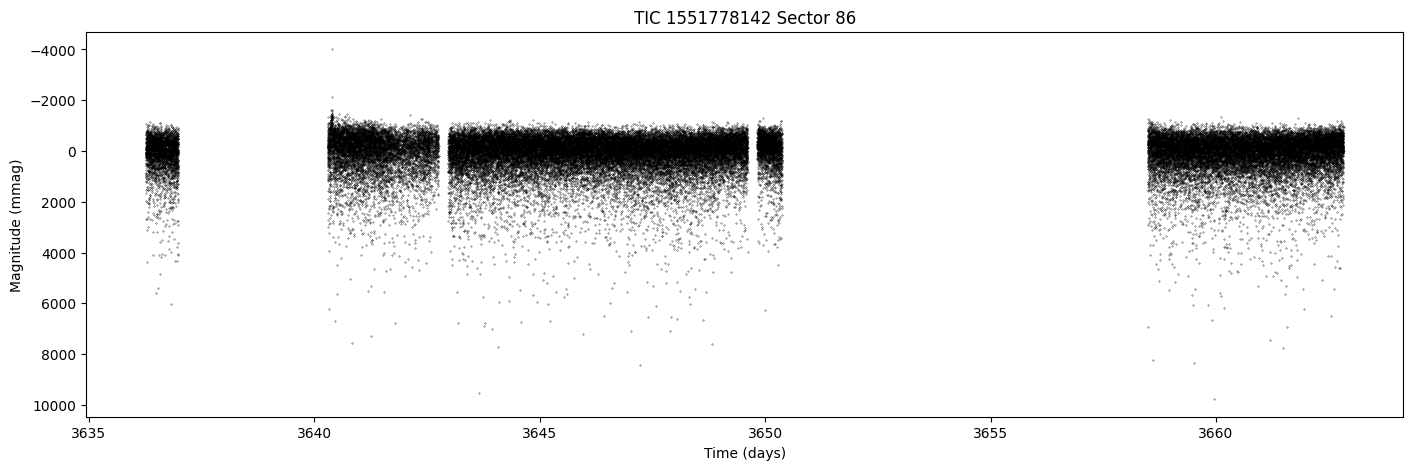

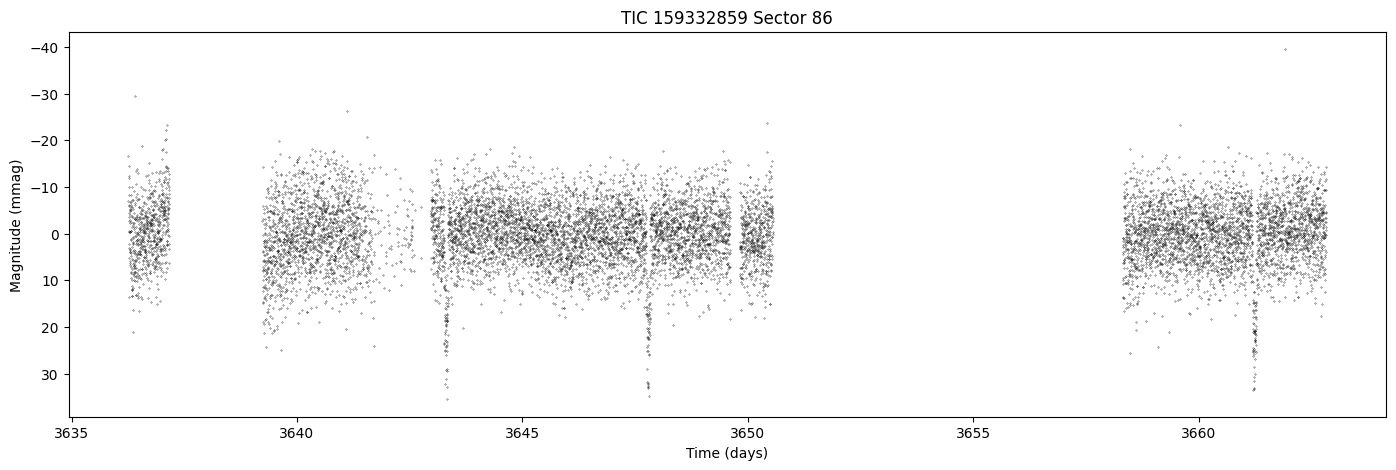

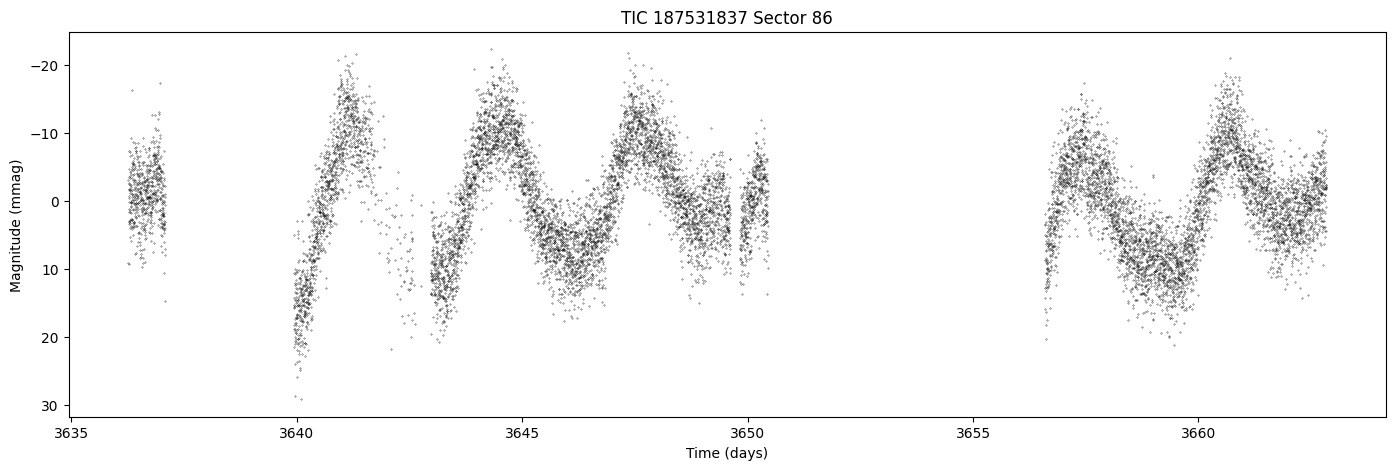

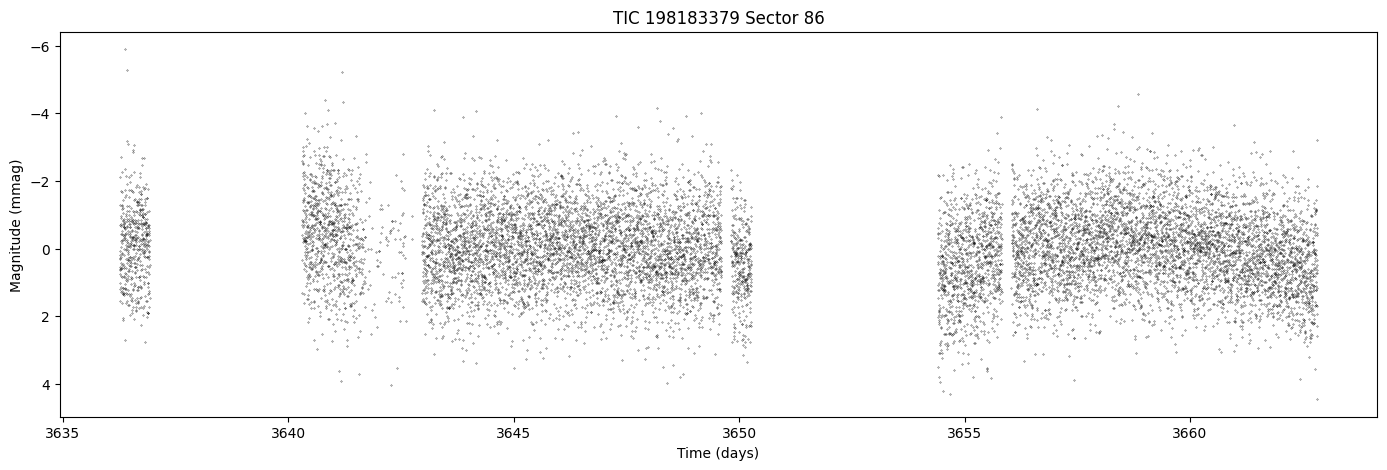

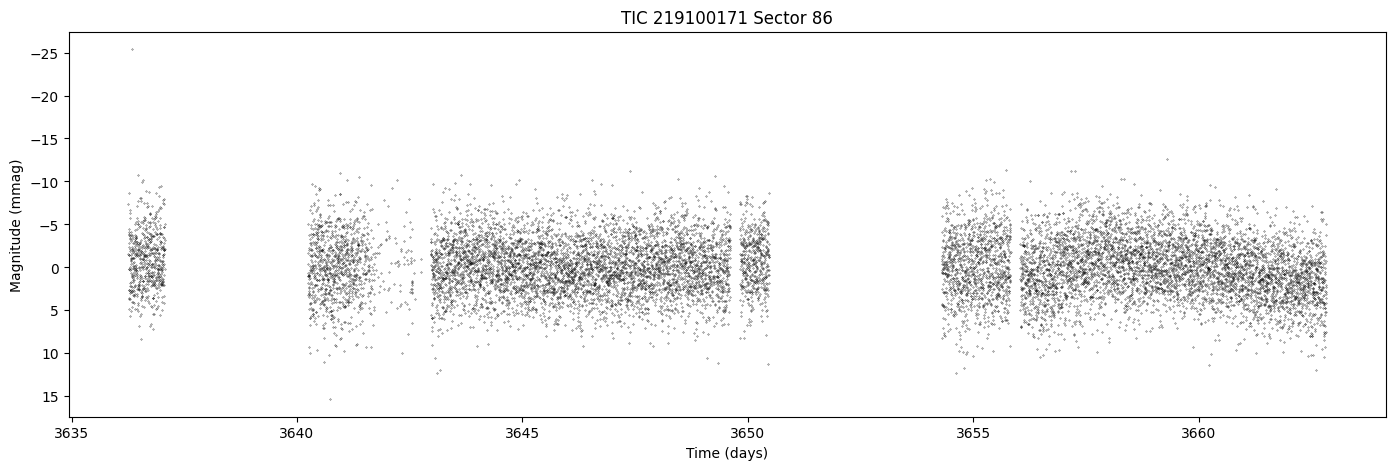

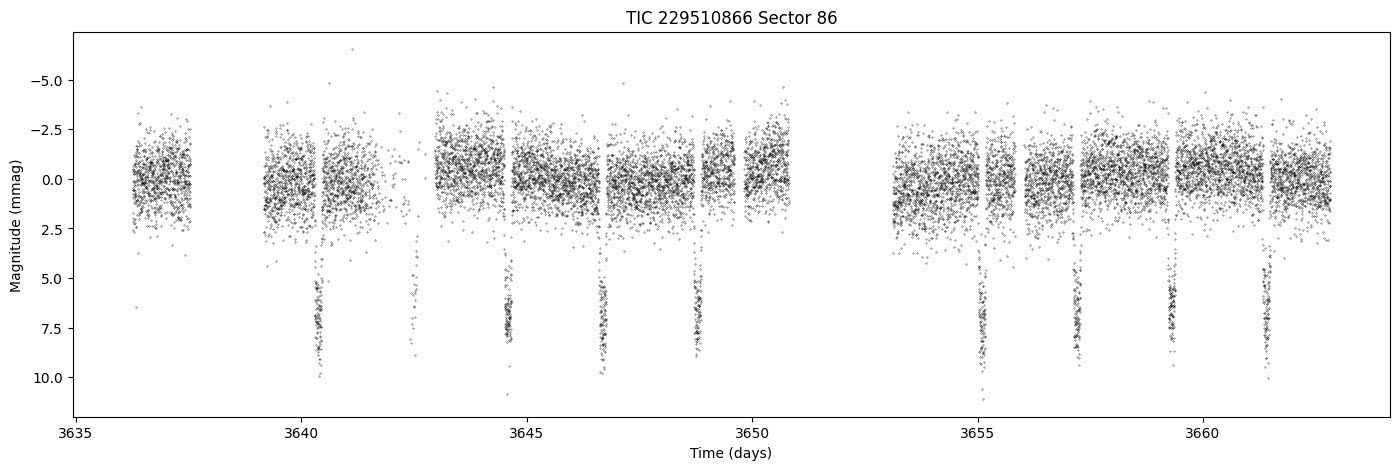

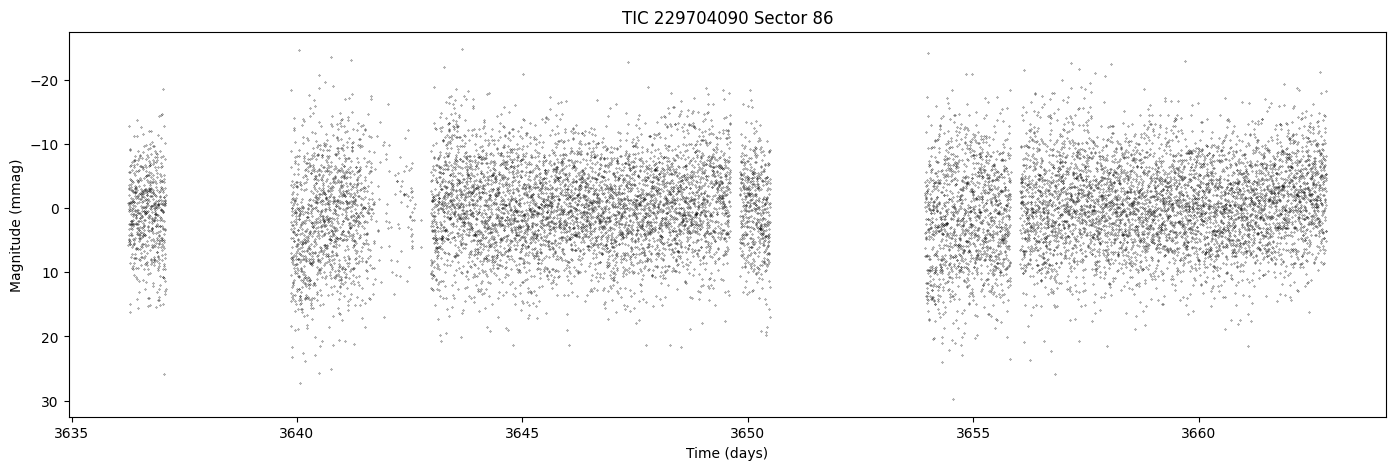

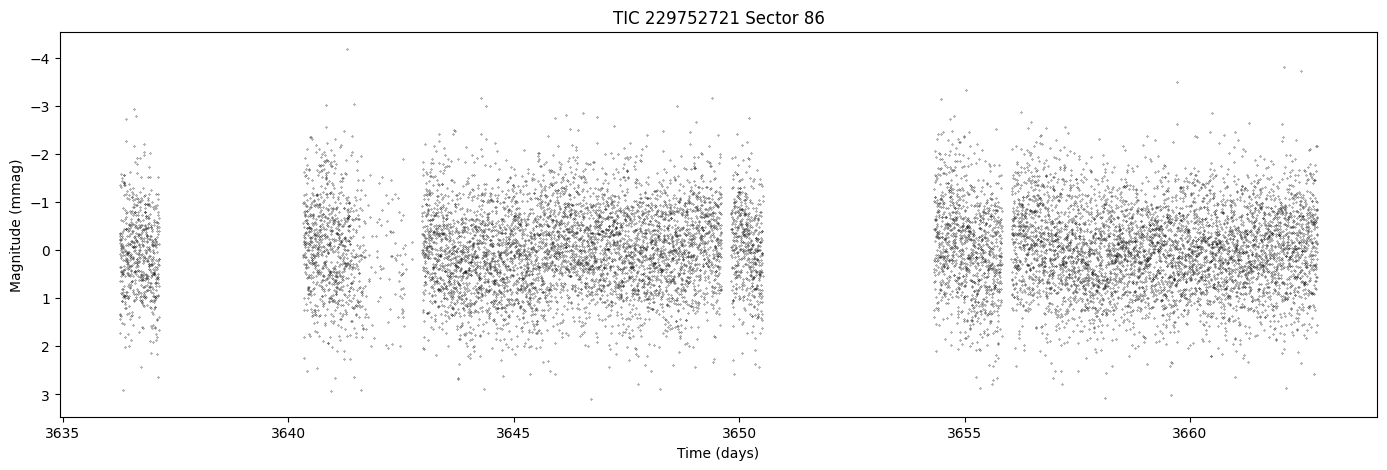

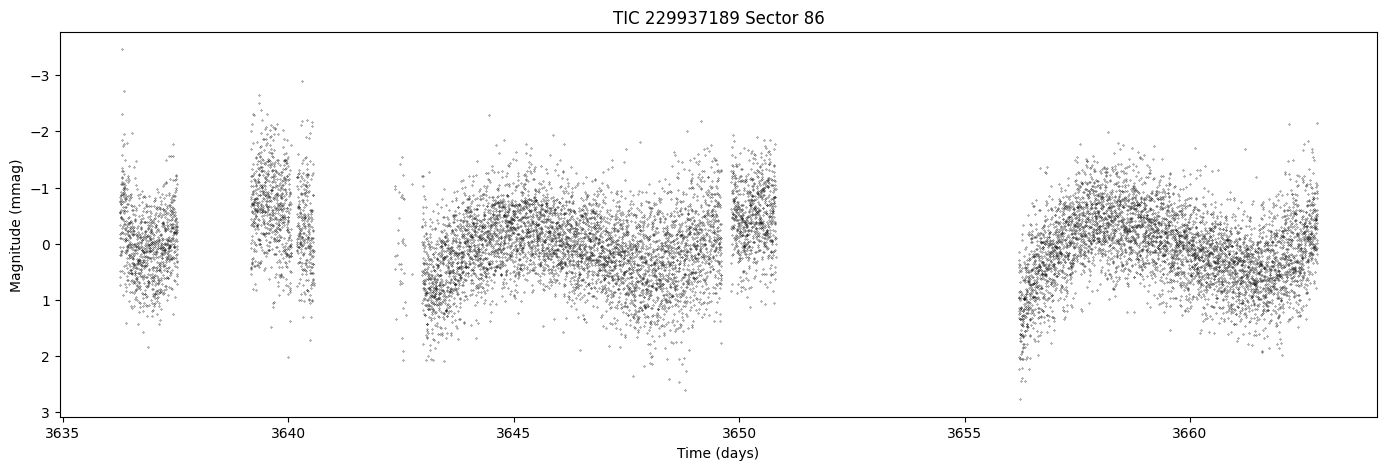

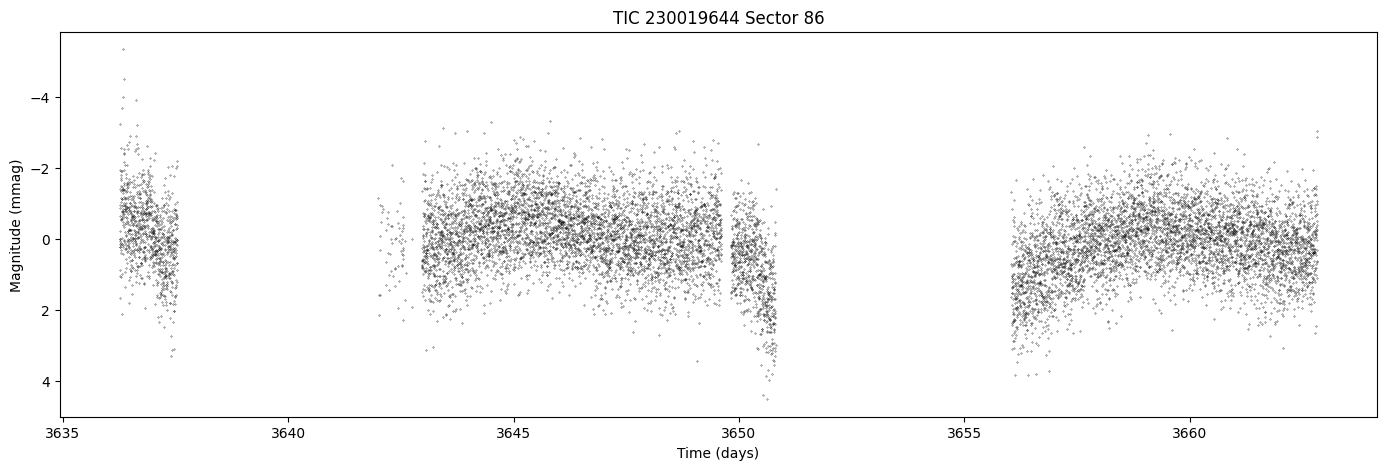

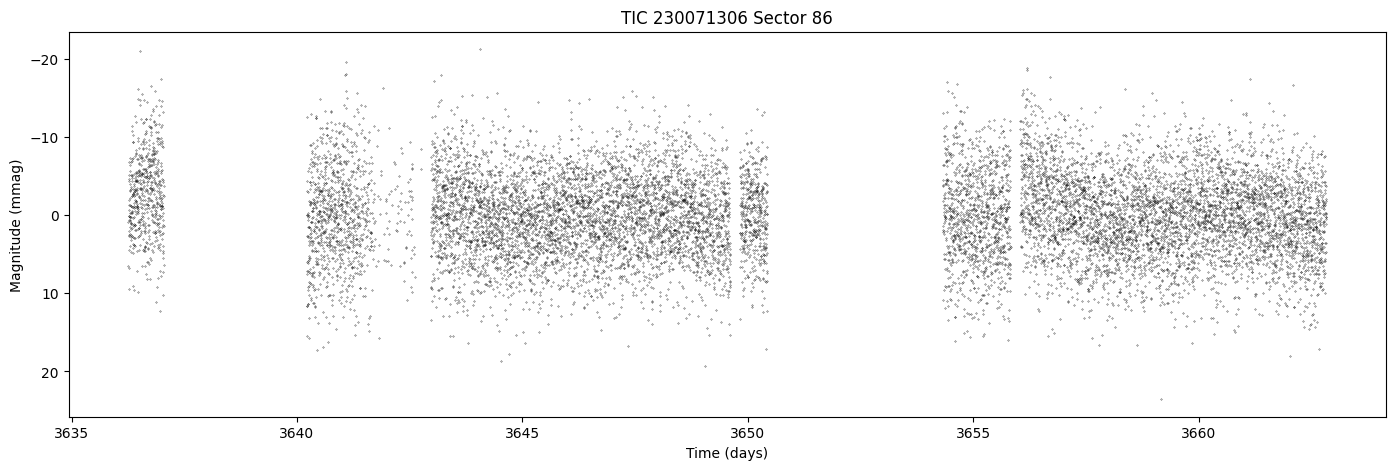

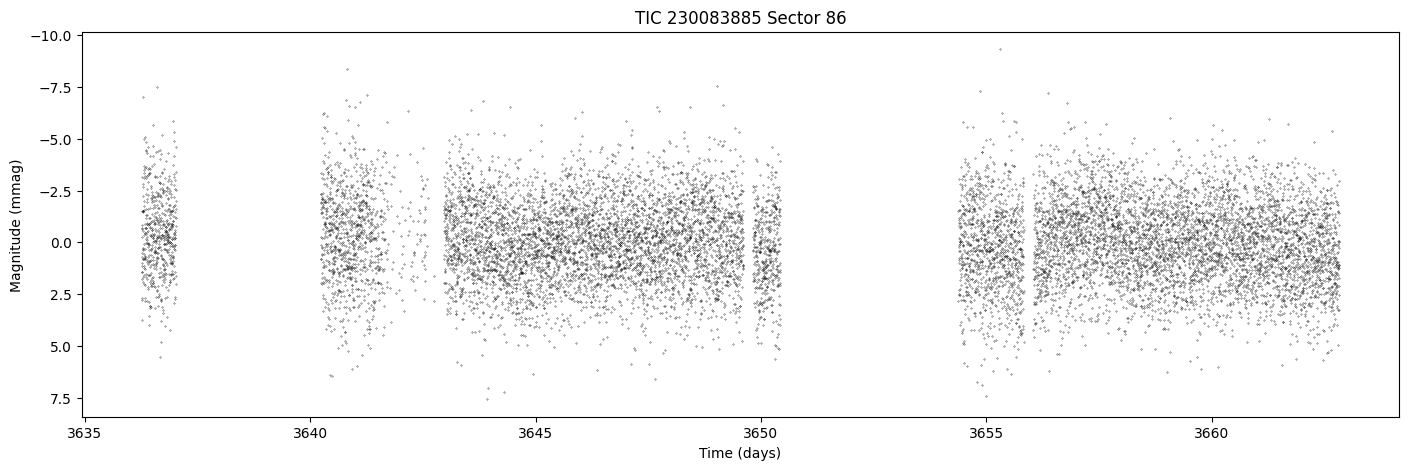

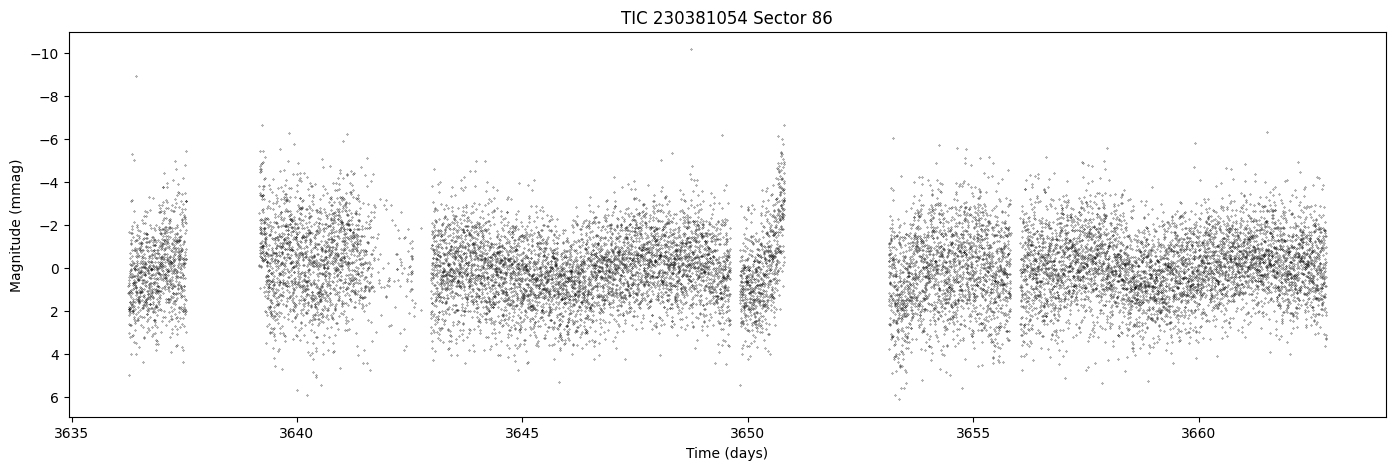

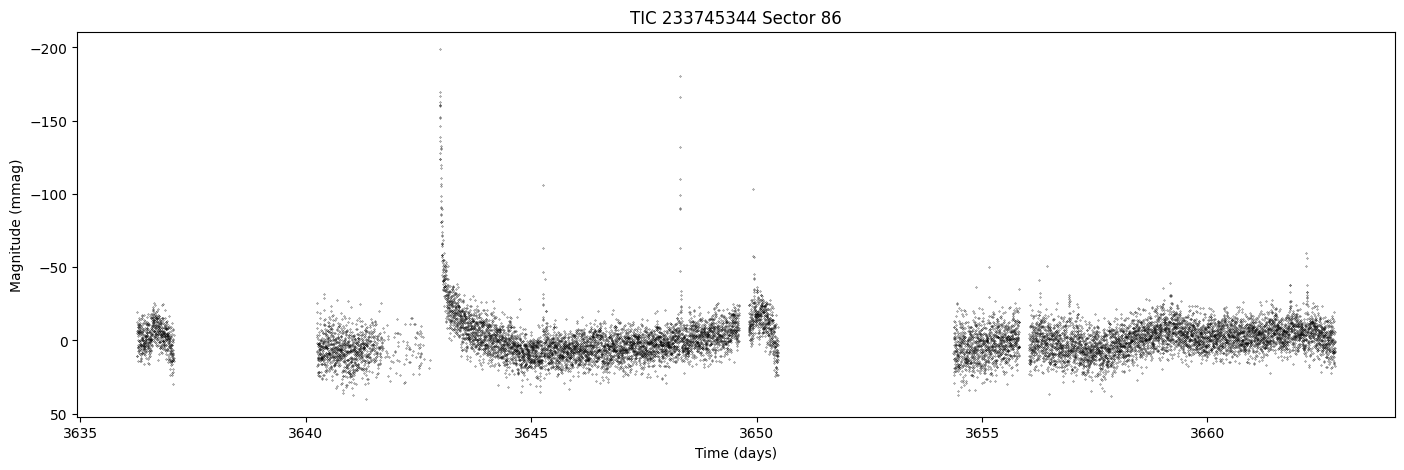

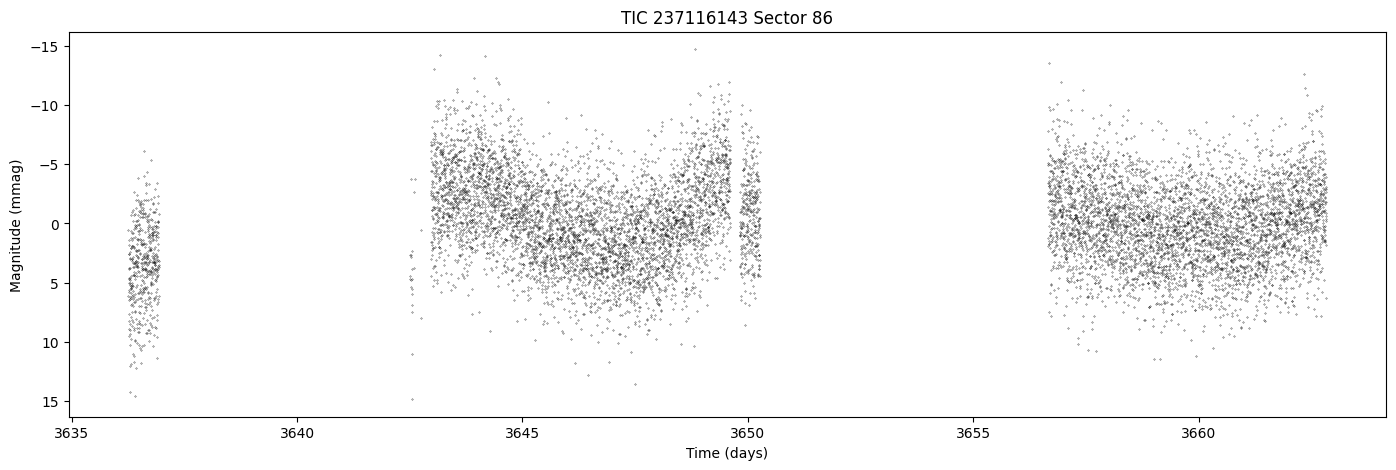

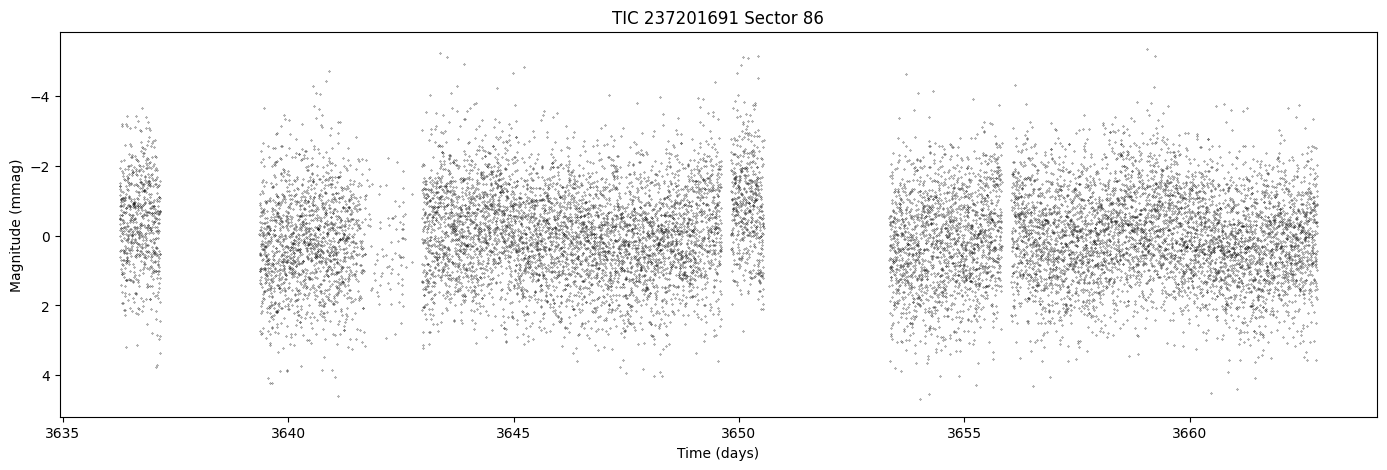

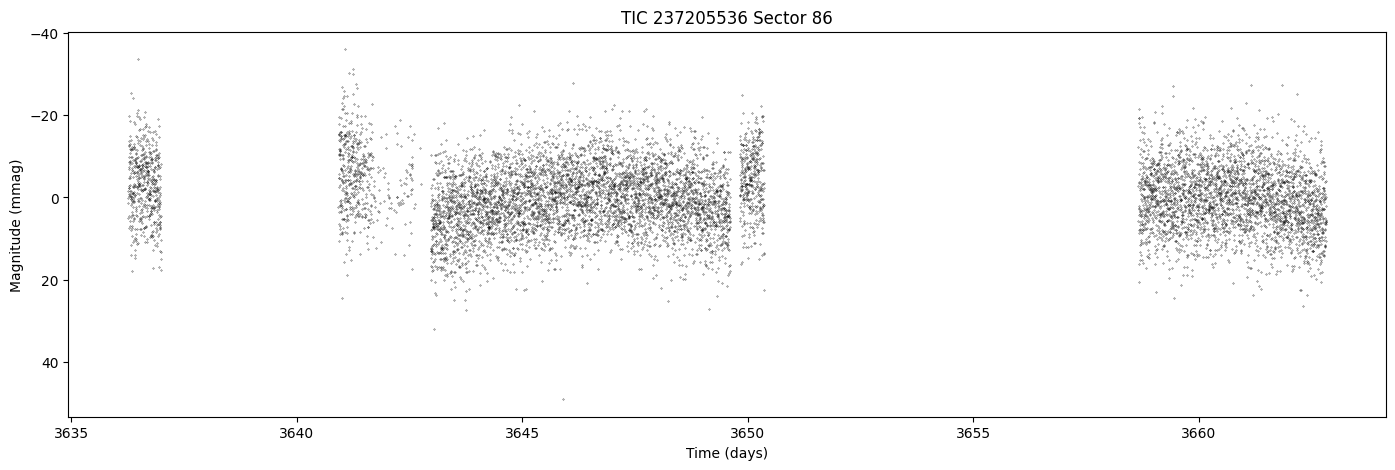

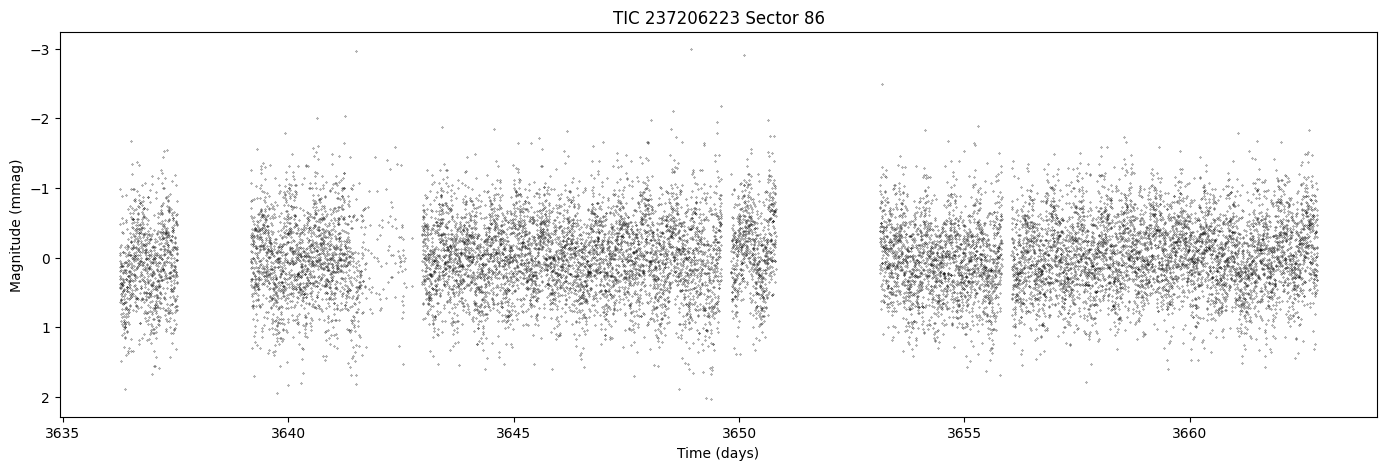

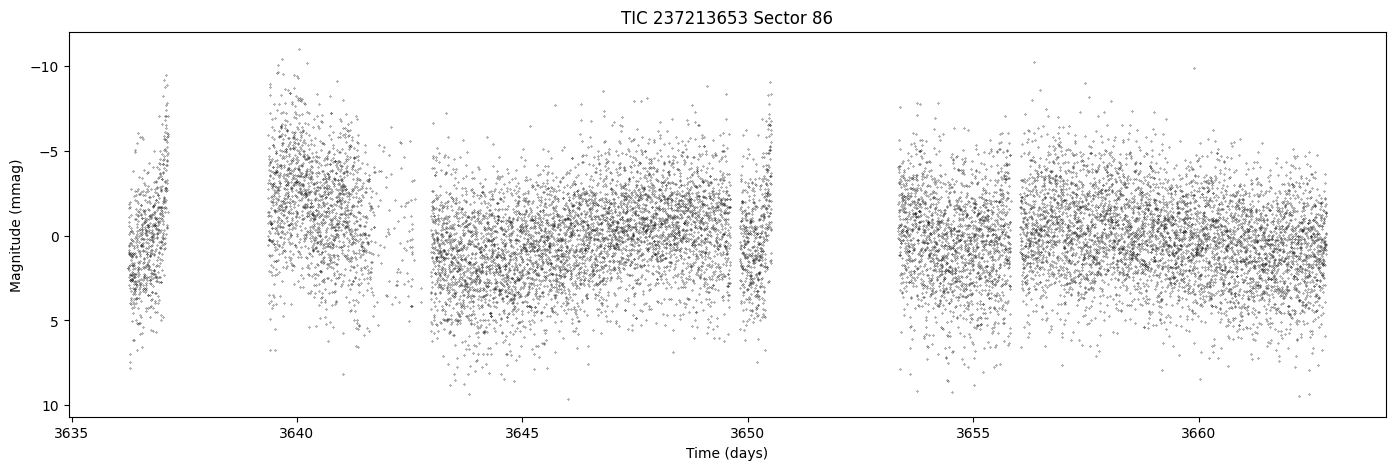

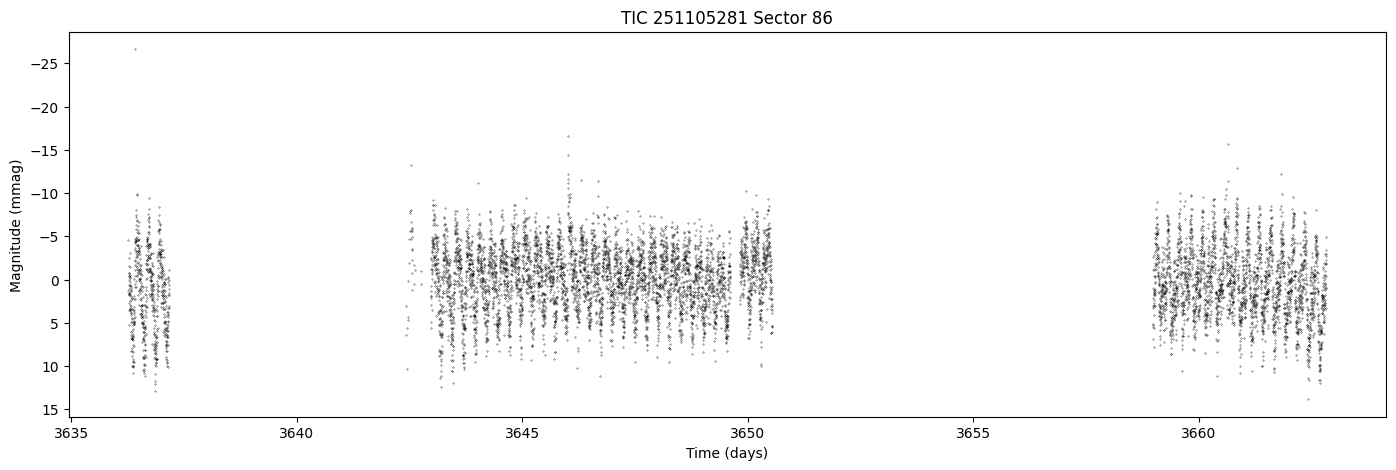

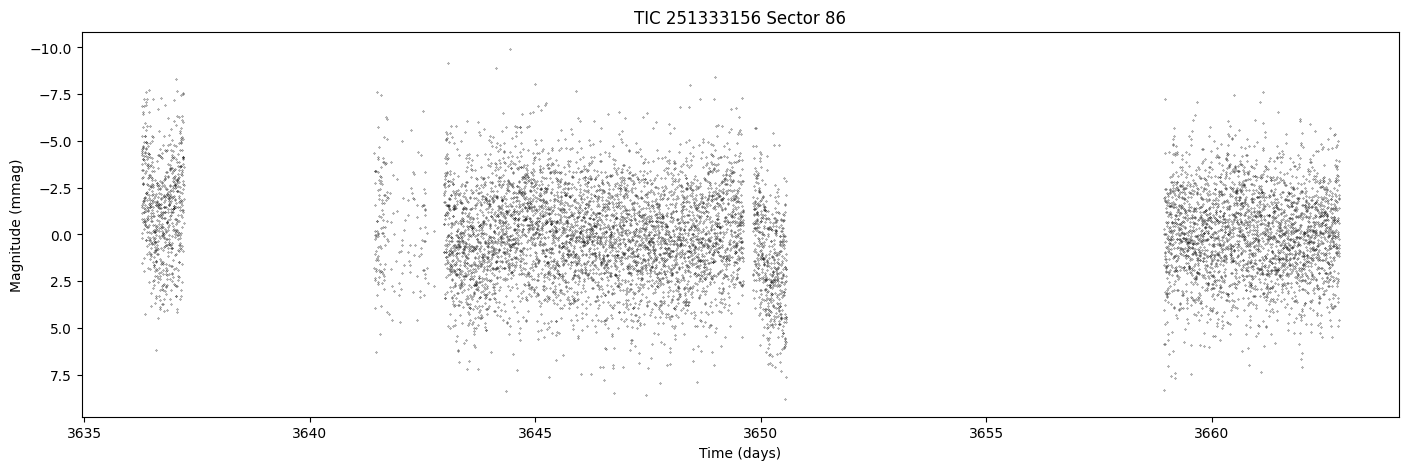

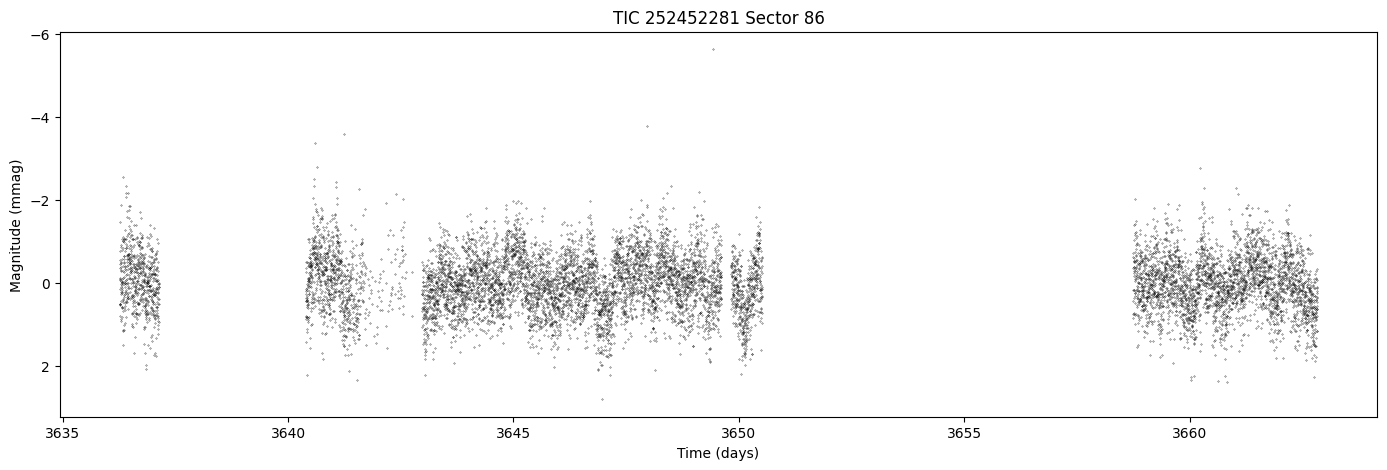

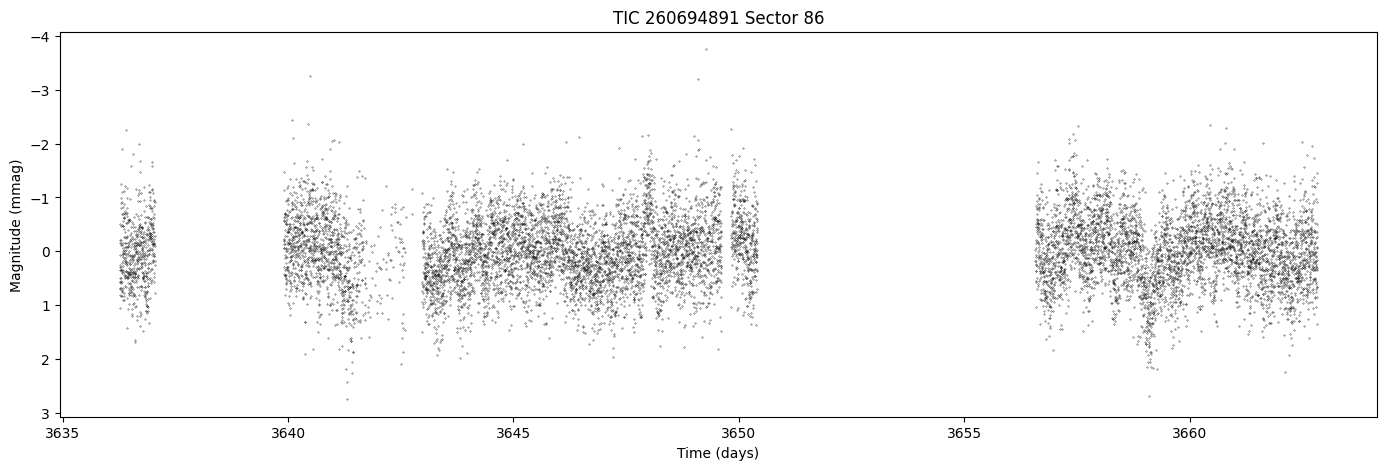

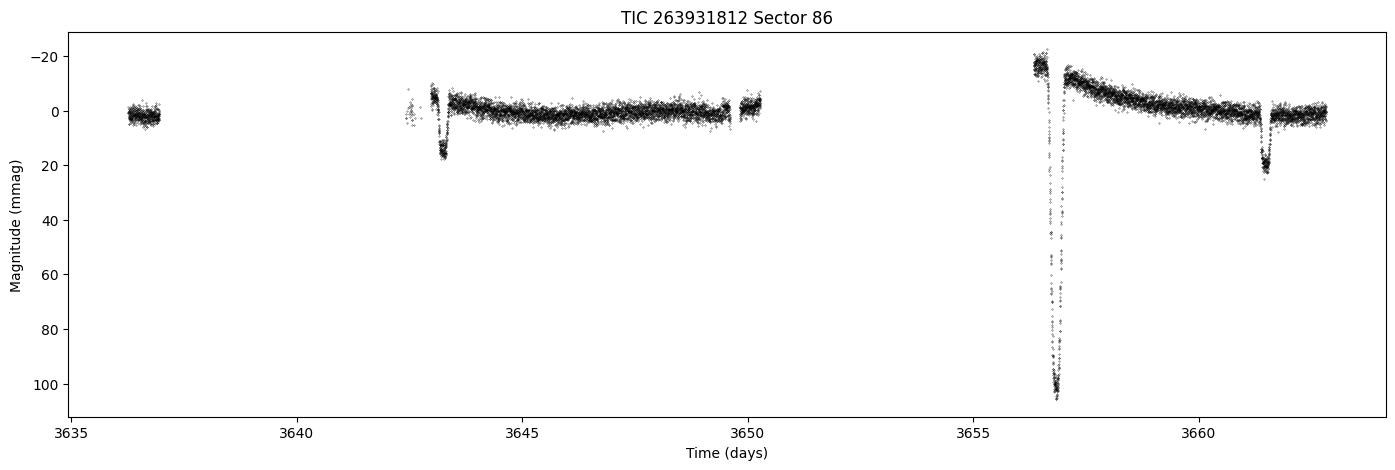

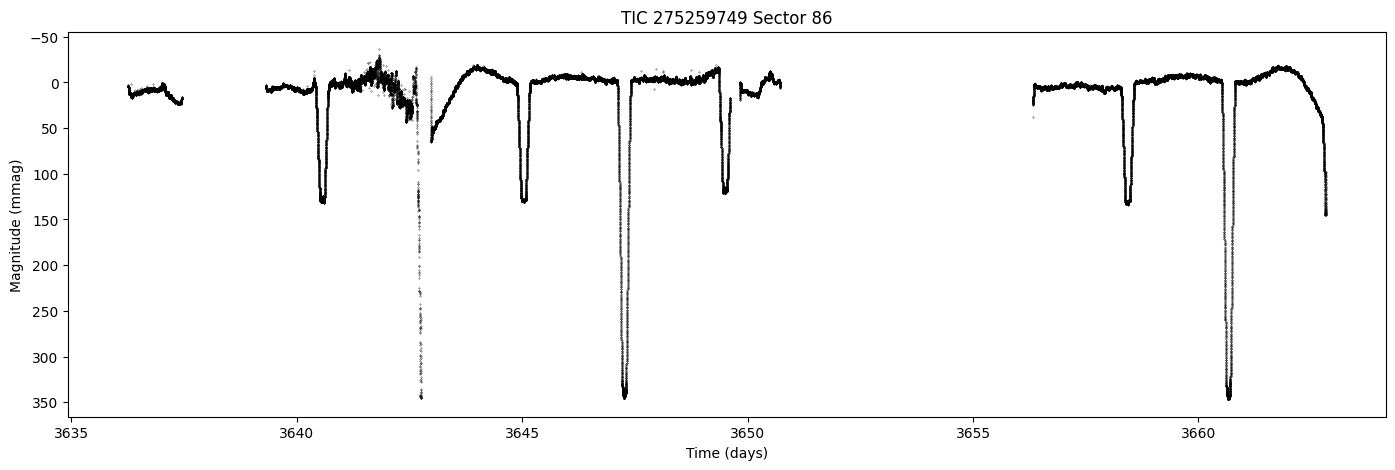

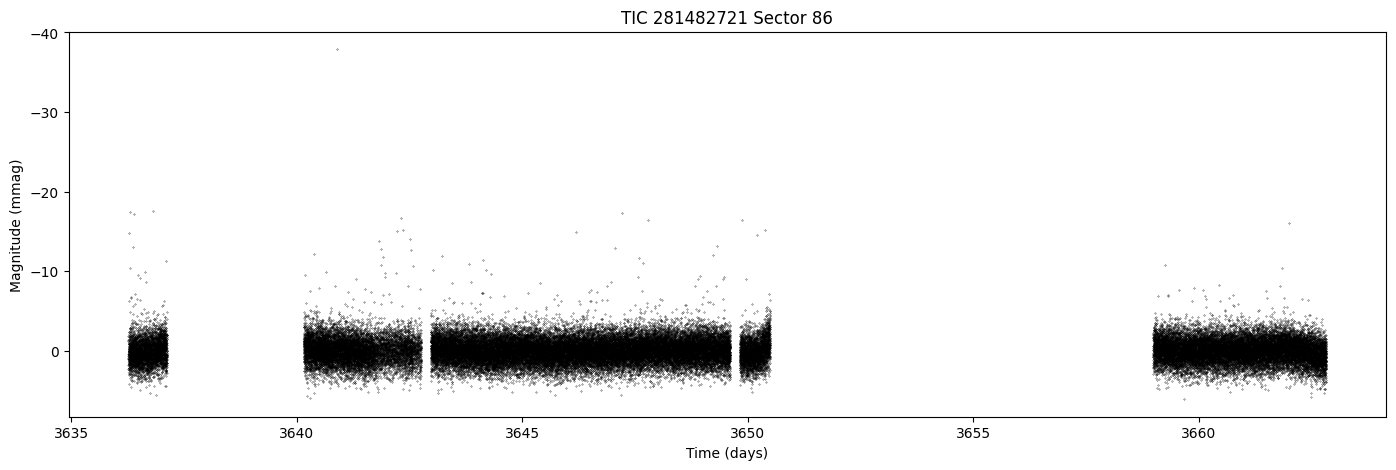

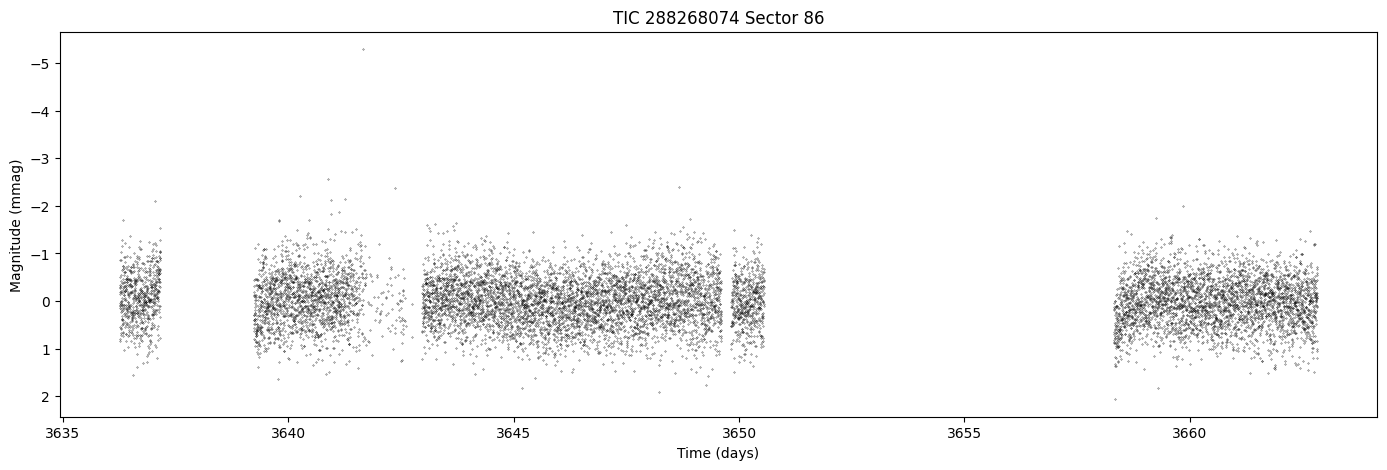

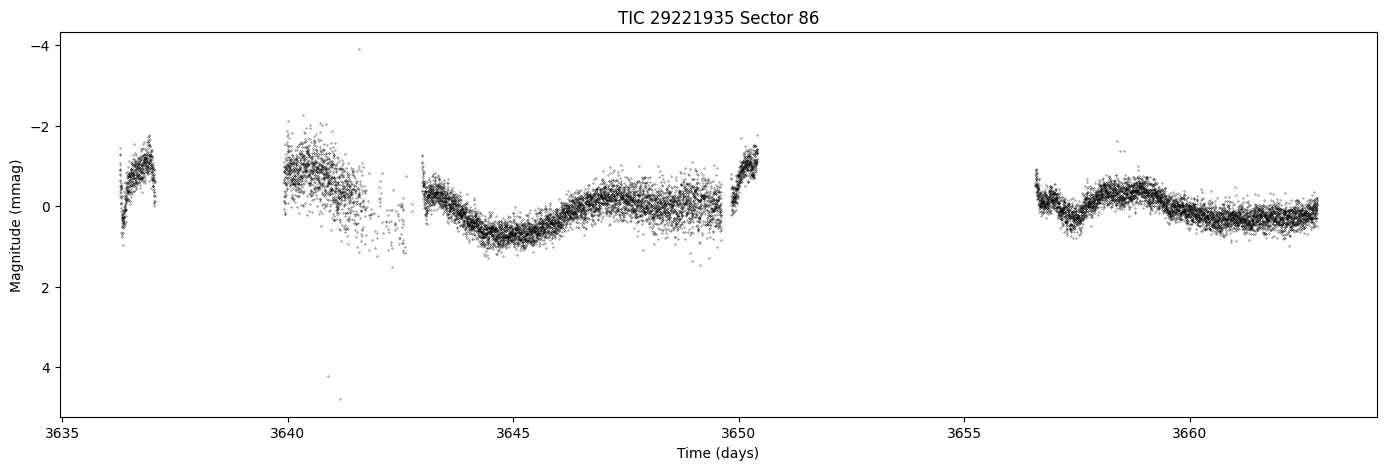

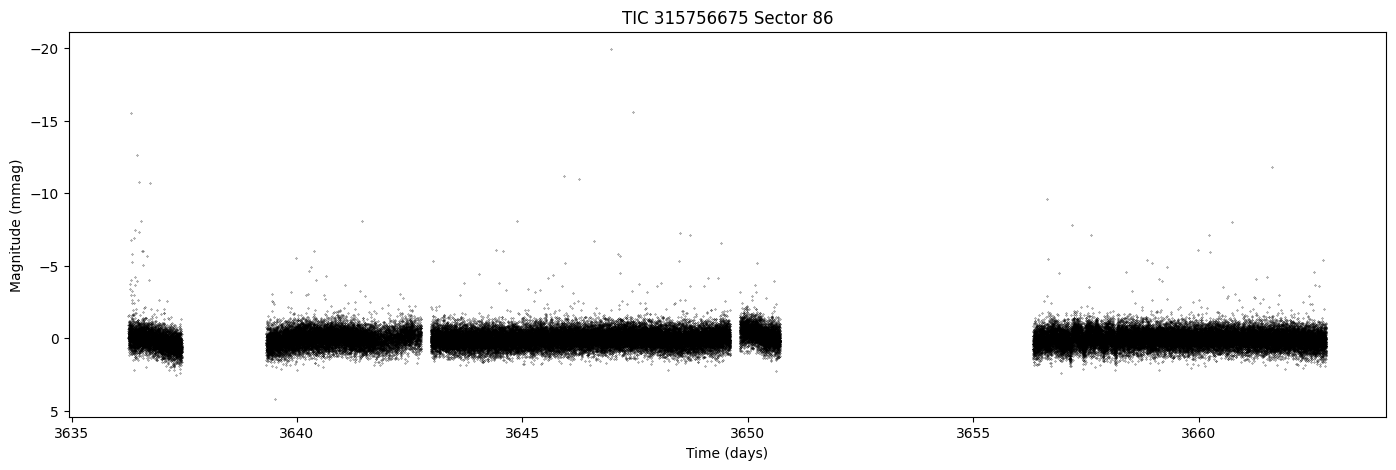

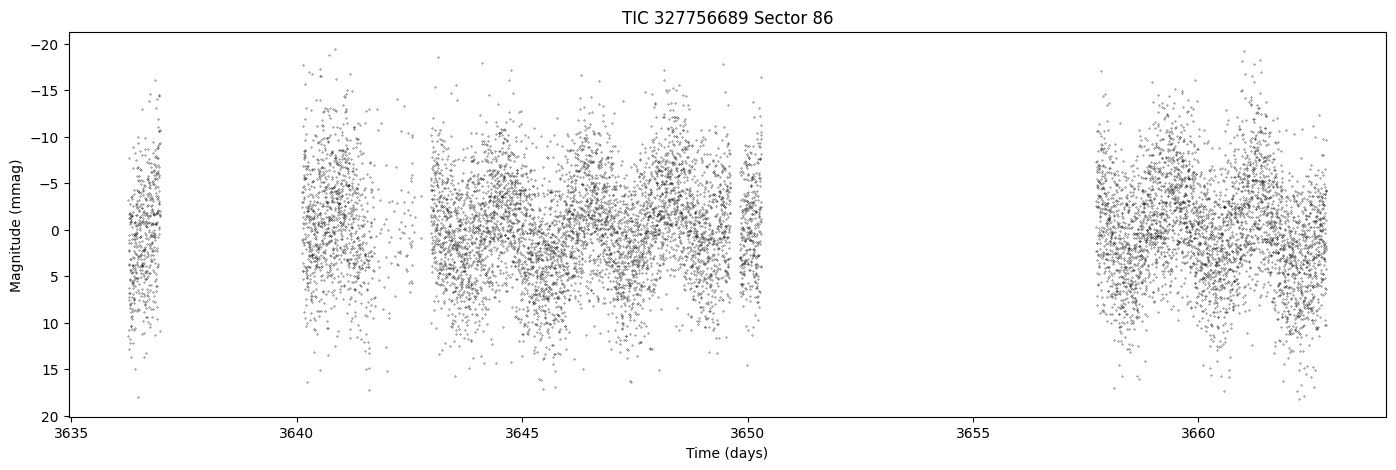

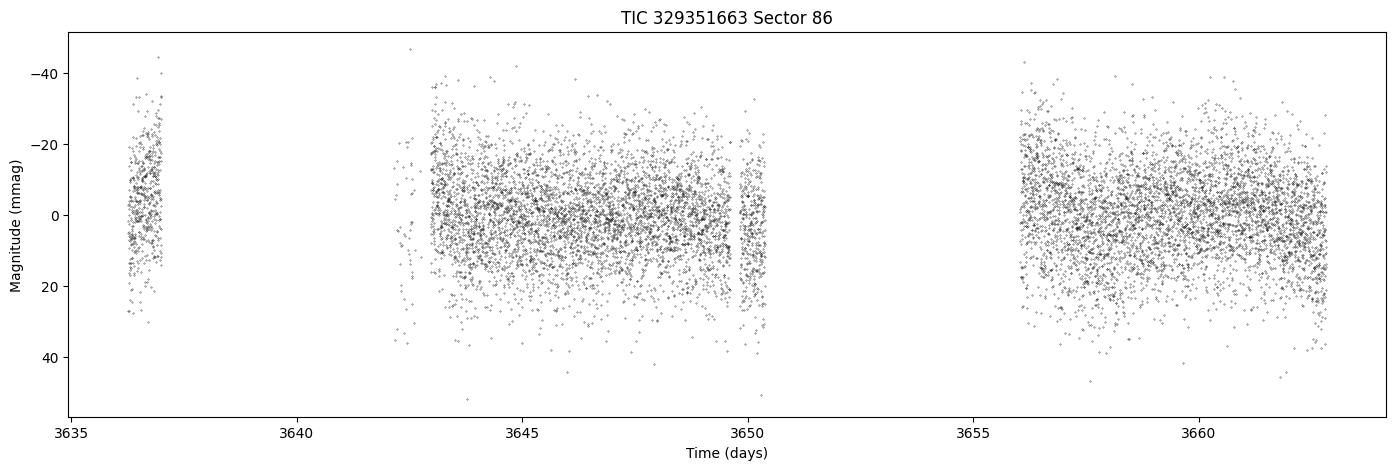

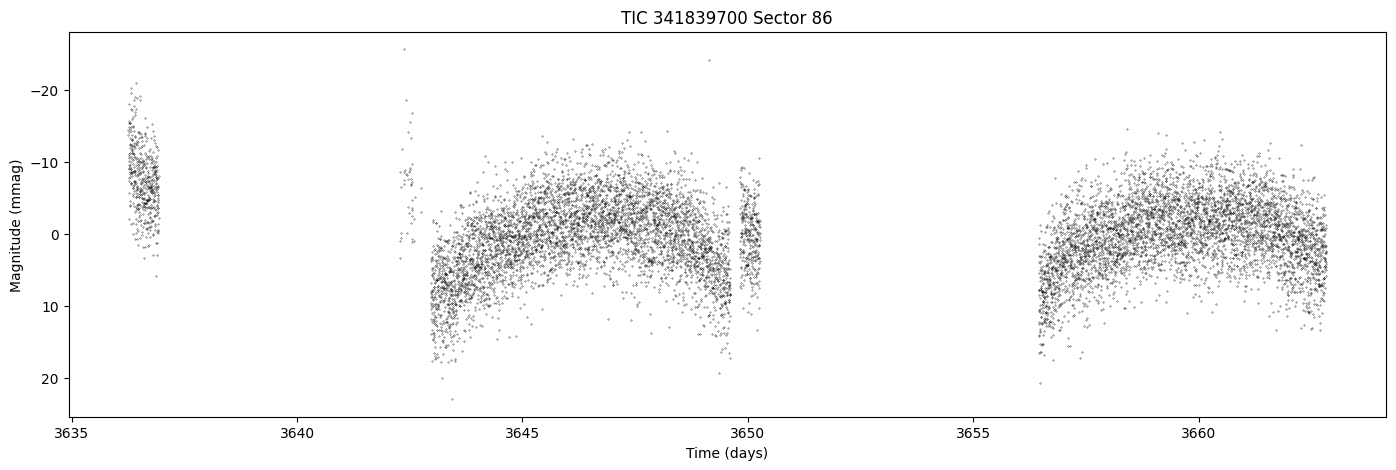

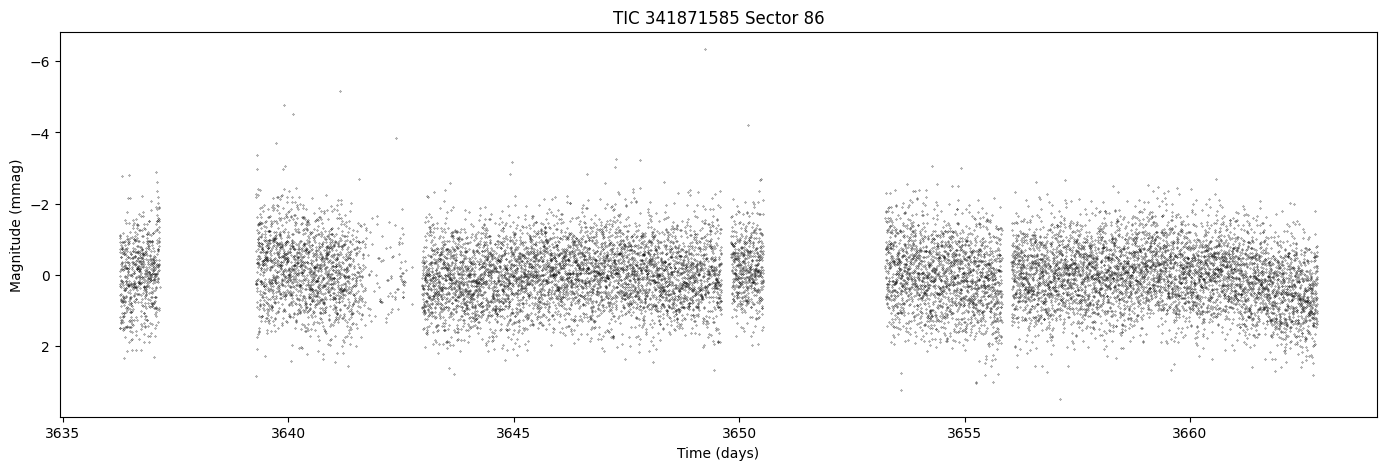

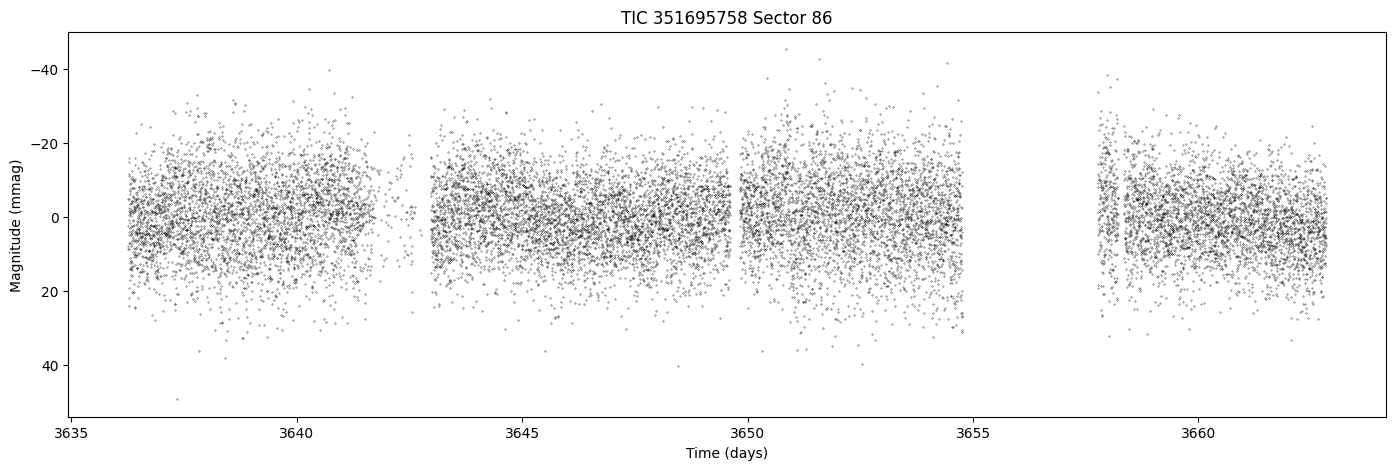

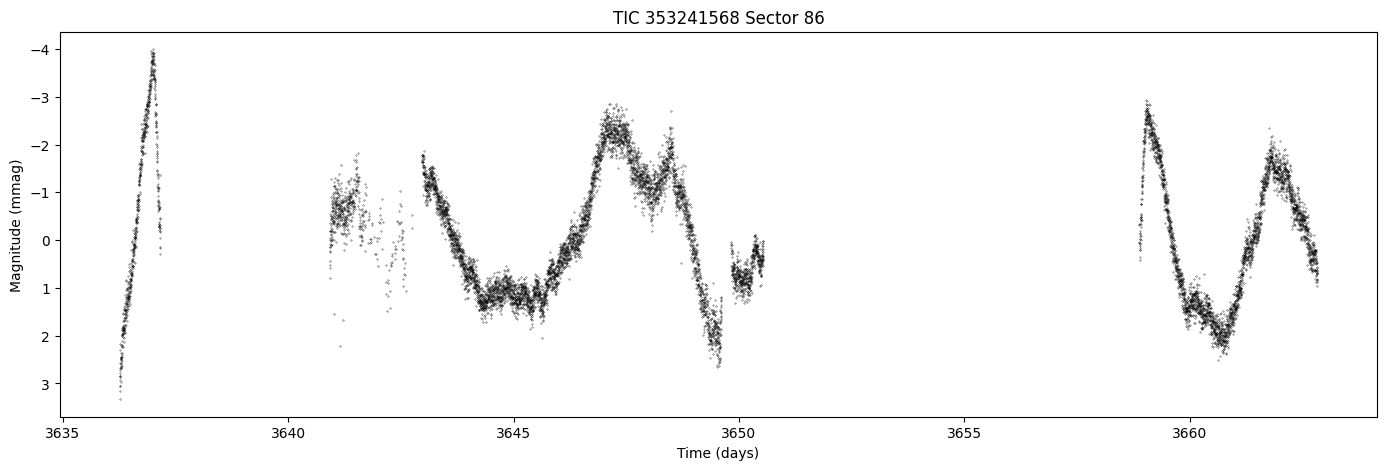

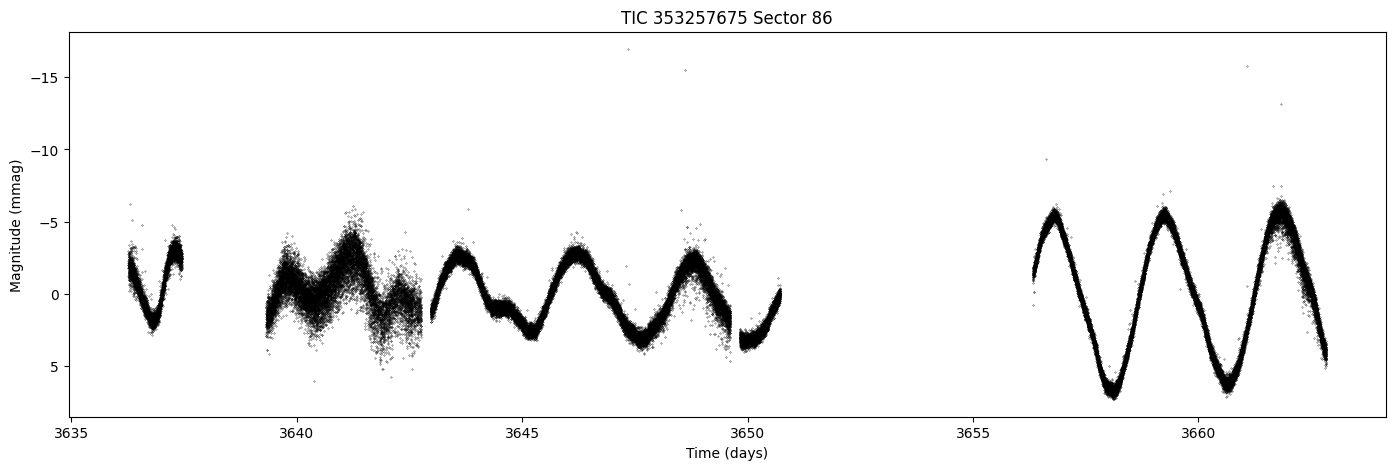

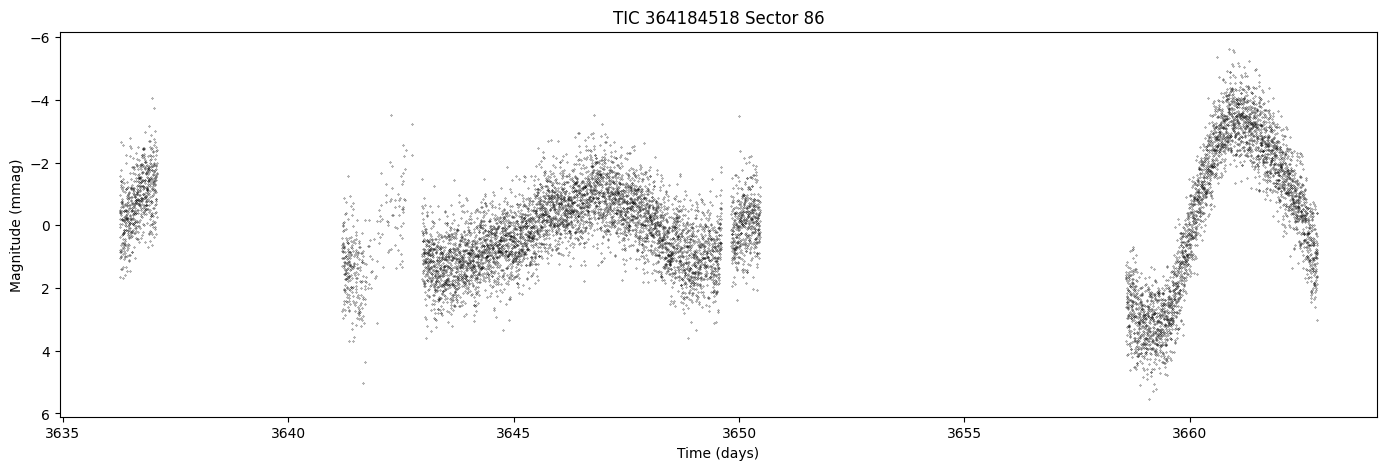

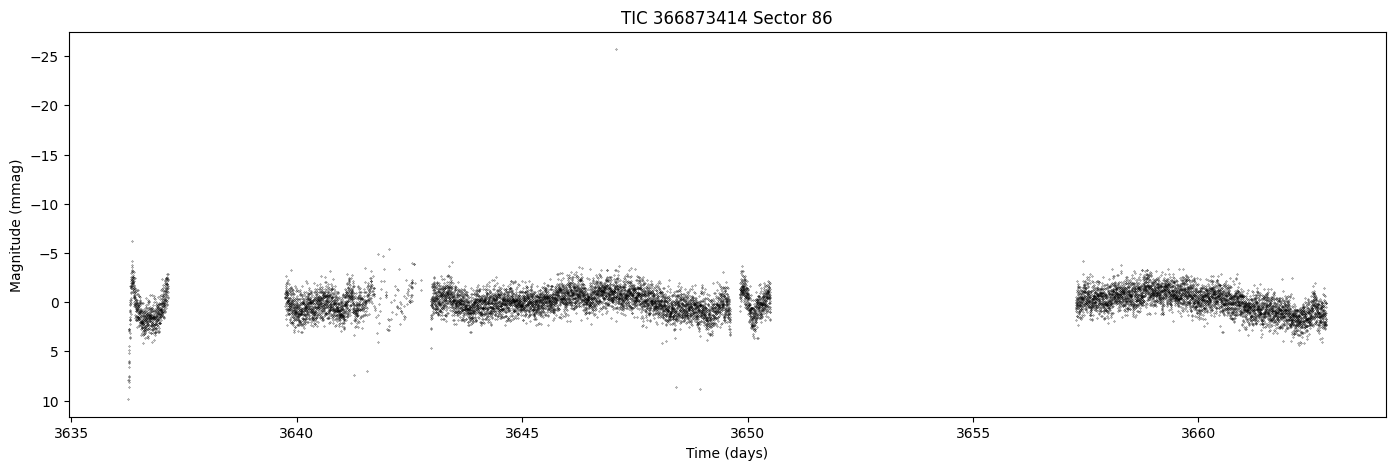

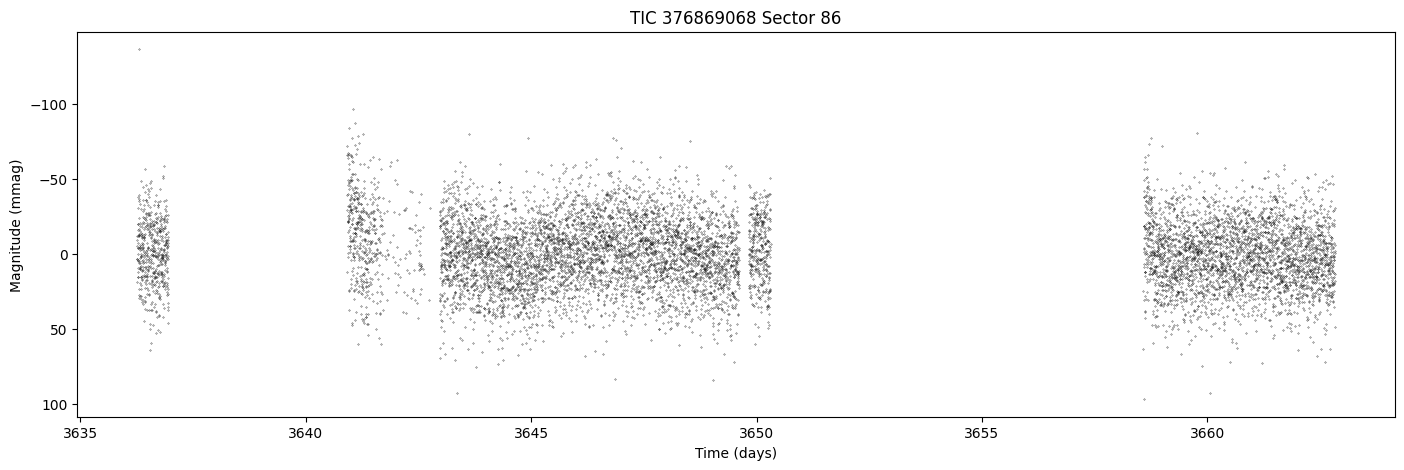

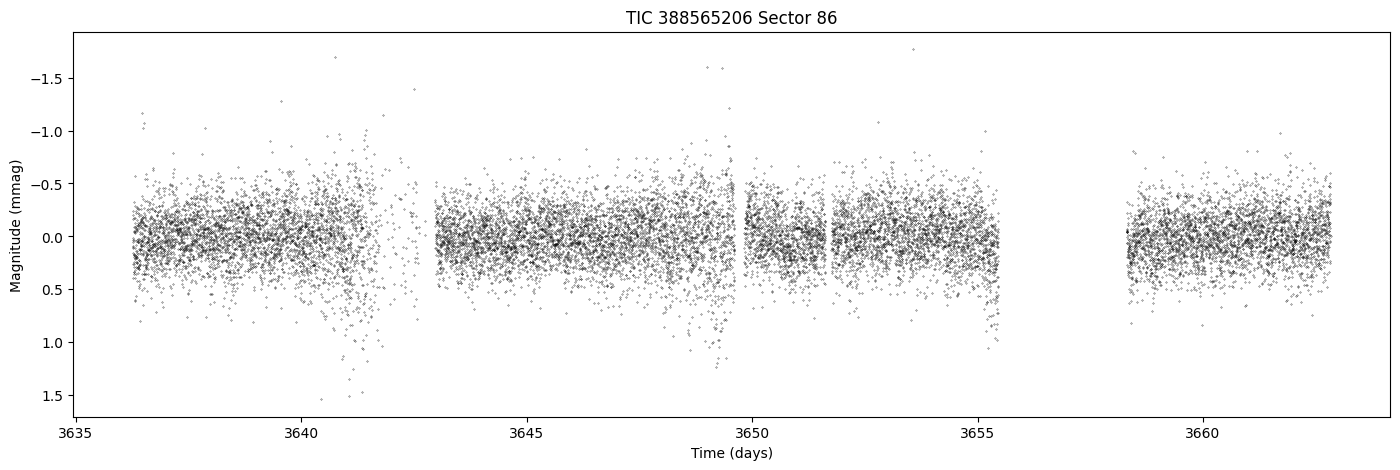

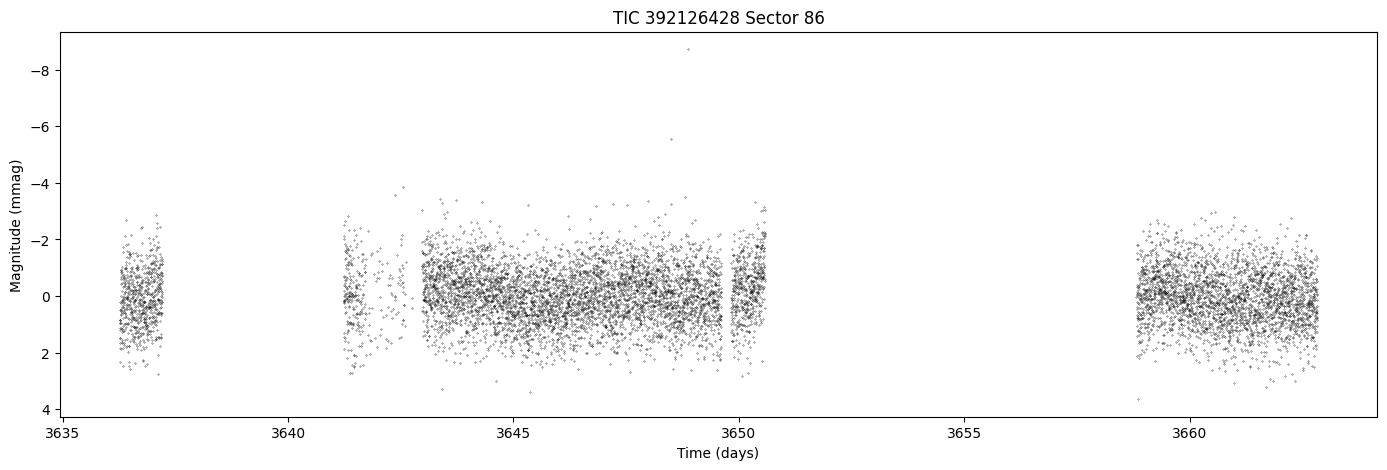

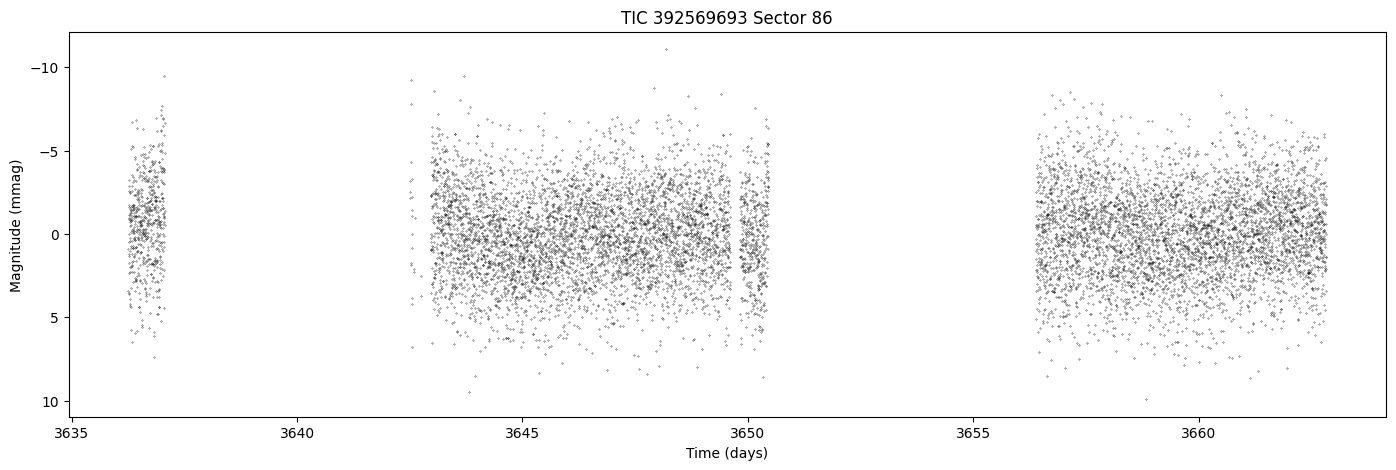

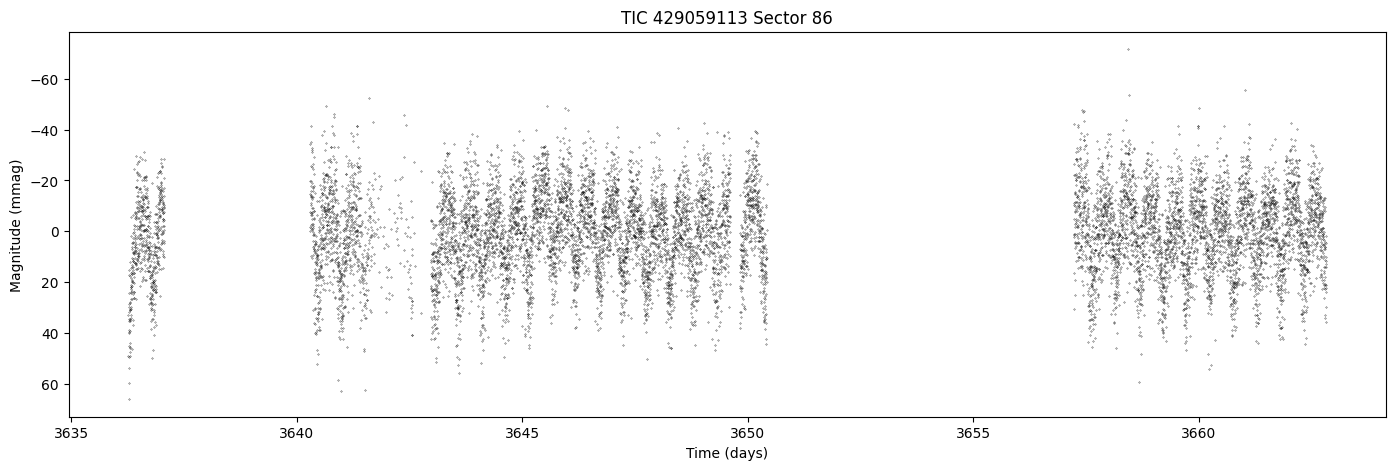

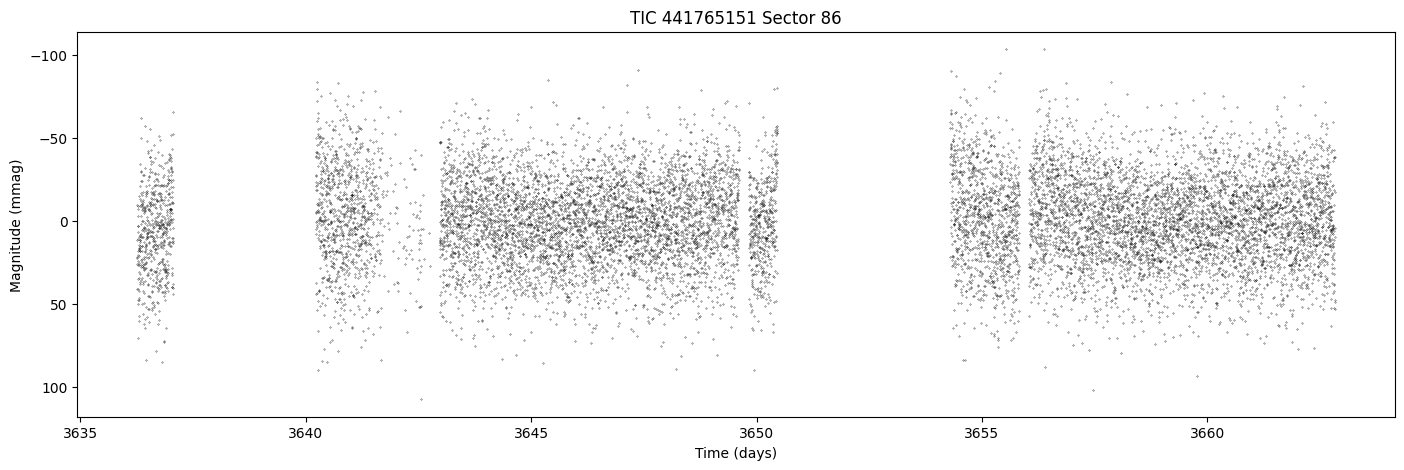

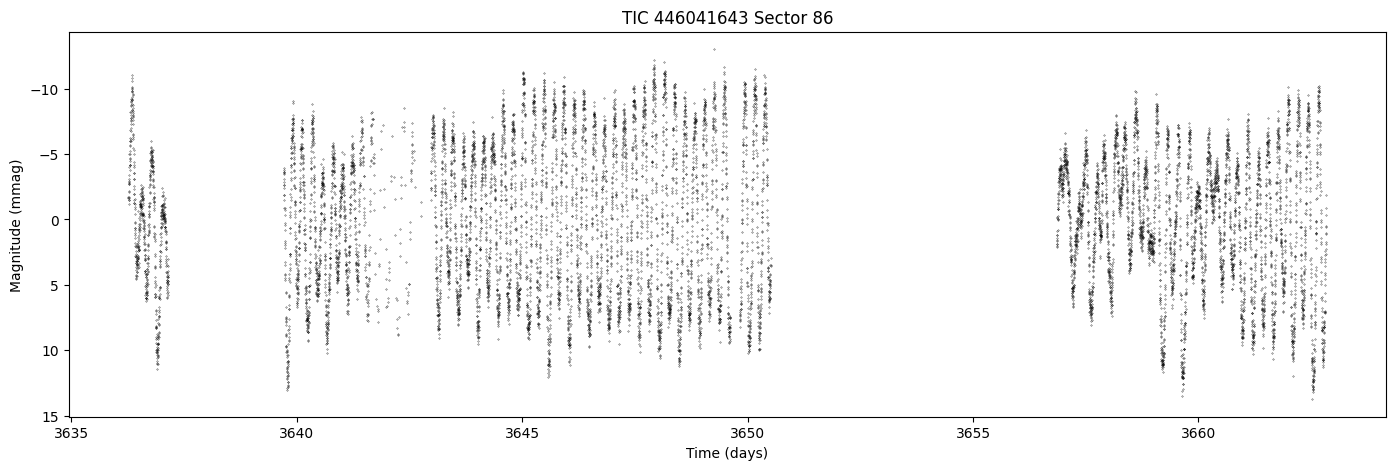

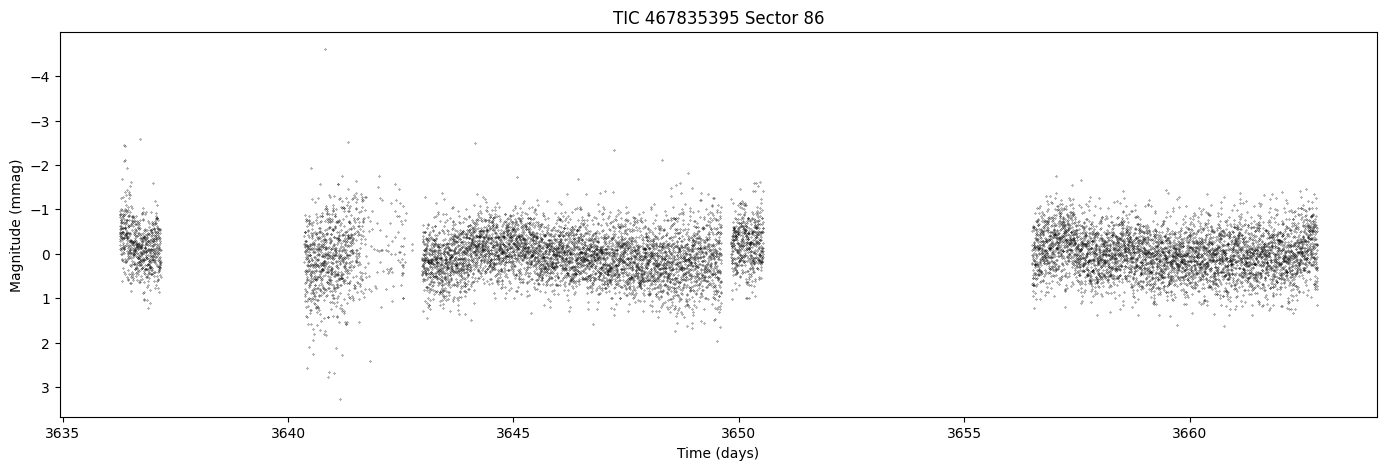

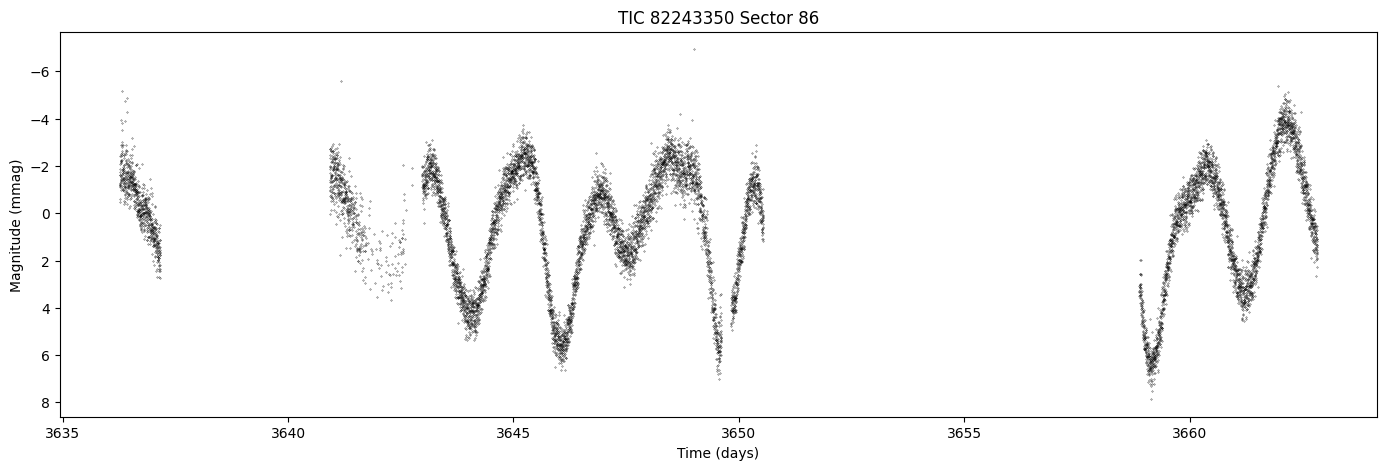

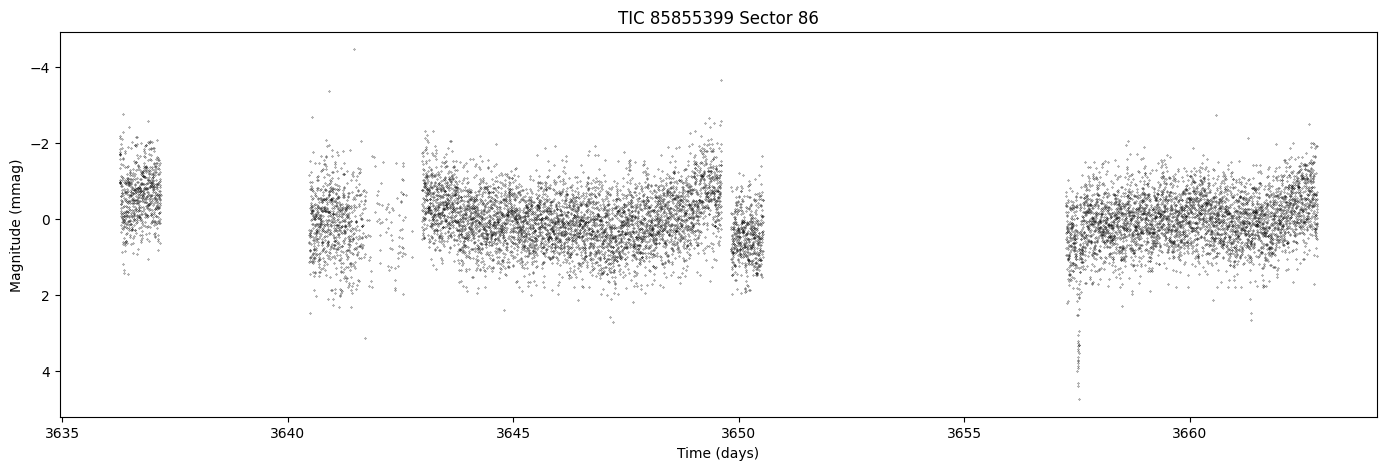

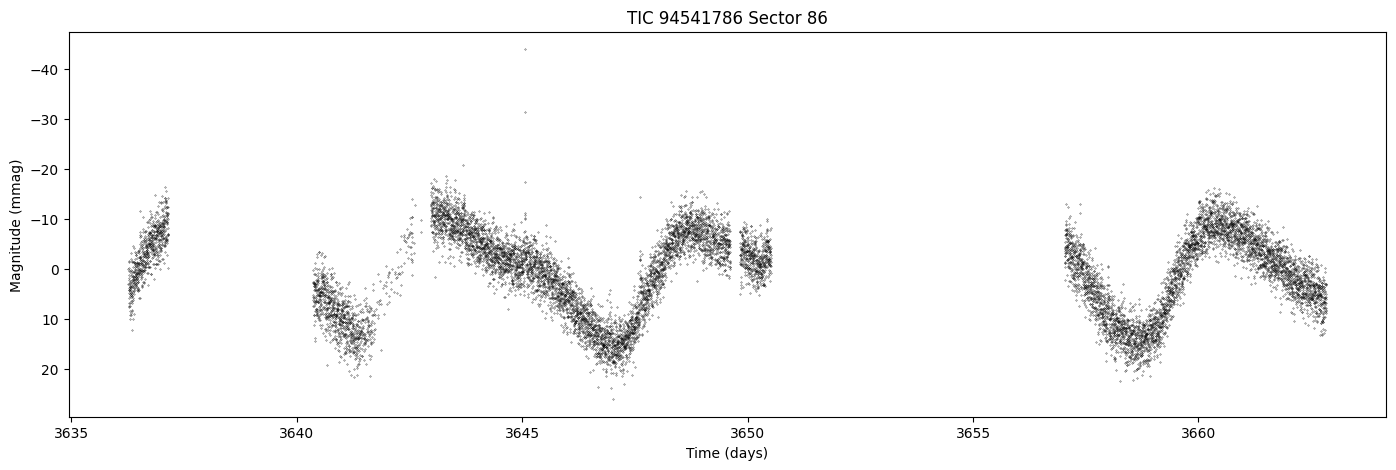

In [16]:
from pprint import pprint

# convert to millimagnitudes
def convert_to_mmag(lc: lk.LightCurve):
  median_flux = np.nanmedian(lc.flux)
  return -2.5 * np.log10(lc.flux / median_flux) * 1000  # Convert to mmag

for lc in lc_datasets:
  # Plot the light curve in millimagnitudes
  plt.figure(figsize=(17, 5))
  # Convert time to a numeric format
  time_numeric = lc.time.value  # Extract time as float values
  plt.plot(time_numeric, convert_to_mmag(lc), 'k.', markersize=0.5)
  plt.xlabel("Time (days)")
  plt.ylabel("Magnitude (mmag)")
  plt.gca().invert_yaxis()  # Magnitudes decrease as brightness increases
  # plt.legend(title="TItle")
  TICID = lc.meta.get("OBJECT", "Unknown")
  SECTOR = lc.meta.get("SECTOR", "Unknown")
  plt.title(f"{TICID} Sector {SECTOR}")
  plt.show()
  # pprint(lc.meta)

## 5 Analyze each star individually (optional)

### 5.1 Search all available sectors for this star

In [ ]:
search_results = lk.search_lightcurve("TIC 275259749", mission="TESS", author="SPOC");
search_results

SearchResult containing 11 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 18 2019   SPOC     120   275259749      0.0
  1 TESS Sector 19 2019   SPOC     120   275259749      0.0
  2 TESS Sector 24 2020   SPOC     120   275259749      0.0
  3 TESS Sector 25 2020   SPOC     120   275259749      0.0
  4 TESS Sector 52 2022   SPOC     120   275259749      0.0
  5 TESS Sector 58 2022   SPOC     120   275259749      0.0
  6 TESS Sector 59 2022   SPOC     120   275259749      0.0
  7 TESS Sector 85 2024   SPOC      20   275259749      0.0
  8 TESS Sector 86 2024   SPOC      20   275259749      0.0
  9 TESS Sector 85 2024   SPOC     120   275259749      0.0
 10 TESS Sector 86 2024   SPOC     120   275259749      0.0

### 5.2 Search sectors which possible to join
It can help to understand the pattern with longer range of observation.
 * download all available sectors
 * plot sectors and decide which is more interested

In [ ]:
select_sector = search_results#[1:2]
select_sector

SearchResult containing 11 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 18 2019   SPOC     120   275259749      0.0
  1 TESS Sector 19 2019   SPOC     120   275259749      0.0
  2 TESS Sector 24 2020   SPOC     120   275259749      0.0
  3 TESS Sector 25 2020   SPOC     120   275259749      0.0
  4 TESS Sector 52 2022   SPOC     120   275259749      0.0
  5 TESS Sector 58 2022   SPOC     120   275259749      0.0
  6 TESS Sector 59 2022   SPOC     120   275259749      0.0
  7 TESS Sector 85 2024   SPOC      20   275259749      0.0
  8 TESS Sector 86 2024   SPOC      20   275259749      0.0
  9 TESS Sector 85 2024   SPOC     120   275259749      0.0
 10 TESS Sector 86 2024   SPOC     120   275259749      0.0

In [ ]:
lc_collection = select_sector.download_all();

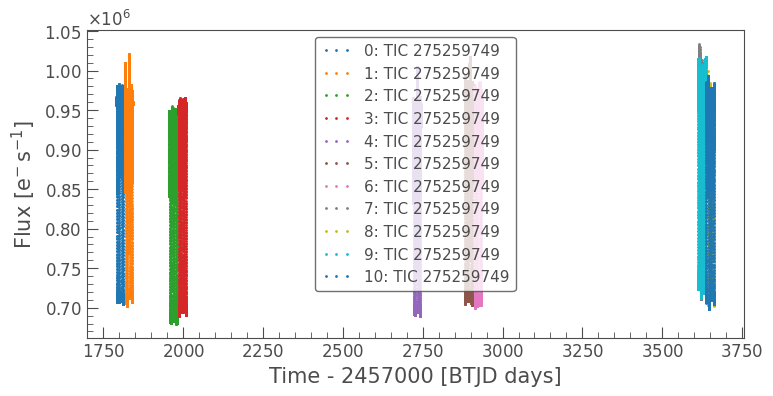

In [ ]:
lc_collection.plot(linewidth=0, marker=".");

### 5.3 Stitch the sectors into one and plot
 Lightkurve library can help you to normalize the flux onto single line and provide better view of lightcurve. We can use different methods for moving noise and approximate some values if we have lots of unnecessary data for particular stiched collection and then plot the chart:
 * remove_outliers()
 * bin(15/24/60)

In [ ]:
lc_collection_stitched = lc_collection.stitch();

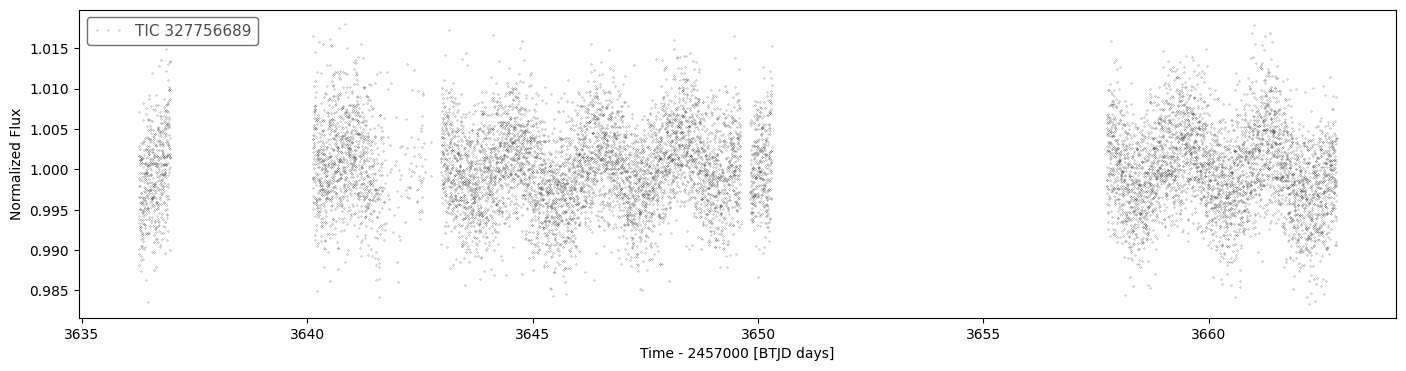

In [ ]:
fig, ax = plt.subplots(figsize=(17, 4))

# Plot the light curve on the defined axis
lc_collection_stitched.plot(
    normalize="true", color="k", linewidth=0, marker=".", markersize=0.3, ax=ax
)

plt.show()

## 6 Find the star in astro catalogs and science publiccations

### 6.1 Retrieve coordinates for particular star

In [ ]:
ra = search_results[0].ra
dec = search_results[0].dec

print(f"{ra} {dec}")
coords = f"{np.squeeze(ra)} {np.squeeze(dec)}";
print(coords)

[11.41280906] [74.98807119]
11.4128090641304 74.9880711918184


### 6.2 Find the stars in Simbad catalog using its coordinates

In [ ]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad

coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
Simbad.TIMEOUT = 120
Simbad.add_votable_fields('parallax', 'V', 'B', 'G', 'J', 'H', 'K', 'biblio')

result = Simbad.query_region(coord, radius='0d2m0s')  # Search within 2 arcmin
display(result)

<Table length=2>
    main_id           ra            dec       ... plx_qual     plx_bibcode     plx_err_prec
                     deg            deg       ...                                          
     object        float64        float64     ...   str1          object          int16    
--------------- -------------- -------------- ... -------- ------------------- ------------
TYC 4307-2168-1 11.42560704982 74.97867272697 ...        A 2020yCat.1350....0G            4
      *  21 Cas  11.4128190385 74.98807060352 ...        A 2020yCat.1350....0G            4

In [ ]:
# query to get all names (identifiers) of an object
result_table = Simbad.query_objectids(result['main_id'][0])
display(result_table)

<Table length=14>
             id            
           object          
---------------------------
Gaia DR3 539047365205651072
              TIC 275259734
    2MASS J00454216+7458433
                ADS   624 B
          CCDM J00457+7459B
            CSI+74    27  2
          GEN# +1.00004161B
            GSC 04307-02168
                 HD   4161B
            TYC 4307-2168-1
                UBV     593
           WDS J00457+7459B
           PMSC 00390+7426B
Gaia DR2 539047365203211008

### 6.3 Find references to science publications in Simbad

In [ ]:
# Check if any objects are found
if result is not None:
    display(result[['main_id', 'ra', 'dec', 'biblio']])

    # Extract and format BibCodes into ADS links
    for i in range(len(result)):
        star_name = result['main_id'][i]
        bibcodes = result['biblio'][i].split('|')
        display(result[['plx_value', 'V', 'B', 'G', 'J', 'H', 'K']])
        print(f"\nReferences for {star_name}:")
        for bibcode in bibcodes[:5]:  # Show first 5 references
            print(f"- 🔗 https://ui.adsabs.harvard.edu/abs/{bibcode}")
        print(len(bibcodes))
else:
    print("No stars found near the given coordinates.")

<Table length=2>
    main_id     ...
                ...
     object     ...
--------------- ...
TYC 4307-2168-1 ...
      *  21 Cas ...

<Table length=2>
plx_value         V                  B          ...         H                 K         
   mas                                          ...                                     
 float64       float64            float64       ...      float64           float64      
--------- ------------------ ------------------ ... ----------------- ------------------
  10.6605               10.5 11.199999809265137 ... 9.088000297546387  9.036999702453613
  10.6528 5.6519999504089355 5.7170000076293945 ... 5.644000053405762 5.6020002365112305


References for TYC 4307-2168-1:
- 🔗 https://ui.adsabs.harvard.edu/abs/1987A&AS...71..413M
- 🔗 https://ui.adsabs.harvard.edu/abs/1997A&AS..124...75T
- 🔗 https://ui.adsabs.harvard.edu/abs/1998A&A...330..600R
- 🔗 https://ui.adsabs.harvard.edu/abs/2002A&A...382..118T
- 🔗 https://ui.adsabs.harvard.edu/abs/2008MNRAS.389..925T
6


<Table length=2>
plx_value         V                  B          ...         H                 K         
   mas                                          ...                                     
 float64       float64            float64       ...      float64           float64      
--------- ------------------ ------------------ ... ----------------- ------------------
  10.6605               10.5 11.199999809265137 ... 9.088000297546387  9.036999702453613
  10.6528 5.6519999504089355 5.7170000076293945 ... 5.644000053405762 5.6020002365112305


References for *  21 Cas:
- 🔗 https://ui.adsabs.harvard.edu/abs/1912ApJ....36..169P
- 🔗 https://ui.adsabs.harvard.edu/abs/1932VeBB....9e...1G
- 🔗 https://ui.adsabs.harvard.edu/abs/1945ApJ...102....1R
- 🔗 https://ui.adsabs.harvard.edu/abs/1949BAN....11...71D
- 🔗 https://ui.adsabs.harvard.edu/abs/1950AZh....27...41P
218


### 6.4 Query star's catalogs in VizieR

In [ ]:
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd
from prettytable import PrettyTable

# Interested Catalogs:
# B/vsx/vsx - Variable Star indeX, Version 2025-02-10 (original column names in green) (8965496 rows)
# B/vsx/refs - Bibliography (references) of VSX stars (830415 rows)
# J/ApJS/258/16/tess-ebs - The Eclipsing Binary stars (TESS-EBs) catalog (4584 rows)
catalog1 = "B/vsx/vsx"  # AAVSO Variable Star Index
catalog2 = "J/ApJS/258/16/tess-ebs" # TESS-EBs catalog (4584 rows)
catalog_list = [catalog1, catalog2]

# Define search coordinates
coords = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame="icrs")

# Define search radius
radius = 1 * u.deg  # 1-degree radius search

# Create a Vizier query object
Vizier.ROW_LIMIT = 100  # Limit number of returned rows
result = Vizier.query_region(coords, radius='0d2m0s', catalog=catalog_list)

catalog1 = catalog1.lower()
keys_lower = [key.lower() for key in result.keys()]

if catalog1 in keys_lower:
    real_key = [key for key in result.keys() if key.lower() == catalog1][0]
    df1 = result[real_key].to_pandas()
    print(df1)
else:
    print(f"Catalog '{catalog1}' not found.")

catalog2 = catalog2.lower()
keys_lower = [key.lower() for key in result.keys()]

if catalog2 in keys_lower:
    real_key = [key for key in result.keys() if key.lower() == catalog2][0]
    df2 = result[real_key].to_pandas()
    display(df2)
else:
    display(f"Catalog '{catalog2}' not found.")



   _q      OID n_OID                         Name  V   Type l_max    max  \
0   1     6383     B                       YZ Cas  0  EA/DM         5.64   
1   1  2621540        Gaia DR3 539047365205651072  0    ROT        10.96   

  u_max n_max f_min l_min    min u_min n_min l_Period    Period u_Period  \
0           V               6.06           V           4.467222            
1           G              11.01           G                NaN            

         Sp   RAJ2000   DEJ2000  
0  A2mV+F2V  11.41283  74.98808  
1         K  11.42561  74.97867  


_q         TIC  m_TIC    RAJ2000    DEJ2000    pmRA   pmDE   Tmag  \
0   2  0275259749      1  11.412809  74.988071 -14.708 -23.07  5.698   

          BJD0    e_BJD0       Per     e_Per  Morph  Wp-pf  Dp-pf  Phip-pf  \
0  1820.167827  0.000471  4.467231  0.000009  0.448   0.06   0.28      1.0   

   Ws-pf  Ds-pf  Phis-pf    Wp-2g  Dp-2g  Phip-2g  Ws-2g  Ds-2g  Phis-2g  \
0  0.061   0.12      0.5  0.08671    0.3   0.9999  0.091  0.128   0.4998   

   TESSebs  Simbad  
0  TESSebs  Simbad

## 7 Calculate Spectral Class


## 8 Verify the stars whether they are discovered as variable

In [18]:
columns = ["Star", "Coords", "Simbad URL", "Temperature", "Absolute Magnitude", "References in Simbad", "AAVSO VSI Catalog", "AAVSO VSI Name", "TESS-EBs catalog", "TESS-EBs VType"]
df = pd.DataFrame(columns=columns)
df["Star"] = tic_star_names

In [19]:
lc_datasets = search_lightcurves(tic_star_names, 86, "TESS");

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# list = Simbad.list_votable_fields()[["name", "description"]]
# dfq = list.to_pandas()  # Convert Astropy Table to Pandas DataFrame
# pd.set_option("display.max_rows", None)  # Show all rows
# pd.set_option("display.max_columns", None)  # Show all columns
# display(dfq)

In [20]:
import urllib.parse
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
from astroquery.vizier import Vizier
import math

catalog1 = "B/vsx/vsx"  # AAVSO Variable Star Index
catalog2 = "J/ApJS/258/16/tess-ebs" # TESS-EBs catalog (4584 rows)
catalog_list = [catalog1, catalog2]

coords = {}
temperatures = {}
magnitudes = {}
simbad_urls = {}
reference_counters = {}
aavso_catalog = {}
aavso_catalog_name = {}
tess_ebs_catalog = {}
tess_ebs_catalog_type = {}

for i, lc in tqdm(enumerate(lc_datasets)):
  target_name = "TIC " + str(lc[0].target_name.item())

  ra = lc.ra
  dec = lc.dec
  coords_string = f"{np.squeeze(ra)} {np.squeeze(dec)}";
  coords[target_name] = coords_string
  coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
  Simbad.TIMEOUT = 120
  Simbad.add_votable_fields('plx_value', 'V', 'B', 'biblio')
  # Simbad.add_votable_fields("script_name")
  # result = Simbad.query_region(coord, radius='0d1m0s')  # Search within 2 arcmin
  result = Simbad.query_region(coord)  # Search within 2 arcmin

  # Extract the main identifier to create a reference link
  if len(result) > 1:
    print(f"More than one result founds. tic_id={target_name}, results={len(result)}")

  if result is not None and len(result) > 0:  # Check if there are results
    V = result['V'][0]
    B = result['B'][0]
    temperature = 7290 / (B - V + 0.72)
    temperatures[target_name] = temperature
  else:
    print(f"No SIMBAD match found for RA={ra}, Dec={dec}, tic_id={lc.obsid}")

  if result is not None and len(result) > 0:  # Check if there are results
    V = result['V'][0]
    P = result['plx_value'][0]
    magnitude = V - 10 + 5 * math.log10(P)
    magnitudes[target_name] = magnitude
  else:
    print(f"No SIMBAD match found for RA={ra}, Dec={dec}, tic_id={lc.obsid}")

  if result is not None and len(result) > 0:  # Check if there are results
      main_id = result['main_id'][0].decode() if isinstance(result['main_id'][0], bytes) else result['main_id'][0]
      encoded_main_id = urllib.parse.quote(main_id)
      # Create Simbad reference link
      simbad_url = f"https://simbad.u-strasbg.fr/simbad/sim-id?Ident={encoded_main_id}"

      simbad_urls[target_name]=simbad_url
      reference_counters[target_name]=len(result['biblio'][0].split('|'))
      # print(f"{target_name}: {len(result['biblio'][0].split('|'))}")
      # print(f"script name: {result['script_name']}")
  else:
      print(f"No SIMBAD match found for RA={ra}, Dec={dec}, tic_id={lc.obsid}")

  Vizier.ROW_LIMIT = 100
  vizier_result = Vizier.query_region(coord, radius='0d1m0s', catalog=catalog_list)

  catalog1 = catalog1.lower()
  keys_lower = [key.lower() for key in vizier_result.keys()]

  if catalog1 in keys_lower:
      real_key = [key for key in vizier_result.keys() if key.lower() == catalog1][0]
      df_catalog_1 = vizier_result[real_key].to_pandas()
      aavso_catalog[target_name]=len(df_catalog_1)
      aavso_catalog_name[target_name]=df_catalog_1['Name'][0]

  catalog2 = catalog2.lower()
  keys_lower = [key.lower() for key in vizier_result.keys()]

  if catalog2 in keys_lower:
      real_key = [key for key in vizier_result.keys() if key.lower() == catalog2][0]
      df_catalog_2 = vizier_result[real_key].to_pandas()
      tess_ebs_catalog[target_name]=len(df_catalog_2)
      tess_ebs_catalog_type[target_name]=df_catalog_1['Type'][0]

df["Coords"] = df["Star"].map(coords)
df["Temperature"] = df["Star"].map(temperatures)
df["Absolute Magnitude"] = df["Star"].map(magnitudes)
df["Simbad URL"] = df["Star"].map(simbad_urls)
df["References in Simbad"] = df["Star"].map(reference_counters)
"AAVSO VSI Catalog", "AAVSO VSI Name", "TESS-EBs catalog", "TESS-EBs VType"
df["AAVSO VSI Catalog"] = df["Star"].map(aavso_catalog)
df["AAVSO VSI Name"] = df["Star"].map(aavso_catalog_name)
df["TESS-EBs catalog"] = df["Star"].map(tess_ebs_catalog)
df["TESS-EBs VType"] = df["Star"].map(tess_ebs_catalog_type)
pd.set_option("display.max_colwidth", None)
# Convert URLs to clickable hyperlinks
df["Simbad URL"] = df["Simbad URL"].apply(lambda x: f'<a href="{x}" target="_blank">{x}</a>')

display(HTML(df.to_html(escape=False)))

0it [00:00, ?it/s]

More than one result founds. tic_id=TIC 187531837, results=2
More than one result founds. tic_id=TIC 219100171, results=2
More than one result founds. tic_id=TIC 229704090, results=2
More than one result founds. tic_id=TIC 229937189, results=3


<ipython-input-20-d7bb9bfe0981>:51: UserWarning: Warning: converting a masked element to nan.
  magnitude = V - 10 + 5 * math.log10(P)


More than one result founds. tic_id=TIC 230083885, results=2
More than one result founds. tic_id=TIC 230381054, results=2
More than one result founds. tic_id=TIC 237116143, results=2


<ipython-input-20-d7bb9bfe0981>:51: UserWarning: Warning: converting a masked element to nan.
  magnitude = V - 10 + 5 * math.log10(P)


More than one result founds. tic_id=TIC 237201691, results=2
More than one result founds. tic_id=TIC 237205536, results=2


No SIMBAD match found for RA=[294.97698161], Dec=[73.41433934], tic_id=[236659177]
No SIMBAD match found for RA=[294.97698161], Dec=[73.41433934], tic_id=[236659177]
No SIMBAD match found for RA=[294.97698161], Dec=[73.41433934], tic_id=[236659177]
More than one result founds. tic_id=TIC 251105281, results=3
No SIMBAD match found for RA=[44.30605203], Dec=[55.43821353], tic_id=[236659473]
No SIMBAD match found for RA=[44.30605203], Dec=[55.43821353], tic_id=[236659473]
No SIMBAD match found for RA=[44.30605203], Dec=[55.43821353], tic_id=[236659473]


More than one result founds. tic_id=TIC 275259749, results=2
More than one result founds. tic_id=TIC 329351663, results=2


<ipython-input-20-d7bb9bfe0981>:51: UserWarning: Warning: converting a masked element to nan.
  magnitude = V - 10 + 5 * math.log10(P)


More than one result founds. tic_id=TIC 376869068, results=2


No SIMBAD match found for RA=[280.50243643], Dec=[55.43632009], tic_id=[236664350]
No SIMBAD match found for RA=[280.50243643], Dec=[55.43632009], tic_id=[236664350]
No SIMBAD match found for RA=[280.50243643], Dec=[55.43632009], tic_id=[236664350]
More than one result founds. tic_id=TIC 467835395, results=3
More than one result founds. tic_id=TIC 82243350, results=2


## 9 Show all starts on HR Diagram

In [ ]:
# Read in data that will be used for the calculations.
data = pd.read_csv("https://github.com/adamlamee/CODINGinK12/raw/master/data/stars.csv")

In [ ]:
# We wish to look at the first 5 rows of our data set
data.head(5)

proper         ra        dec    dist    mag  absmag     ci  \
0               Sol   0.000000   0.000000  0.0000 -26.70   4.850  0.656   
1  Proxima Centauri  14.495985 -62.679485  1.2959  11.01  15.447  1.807   
2   Rigil Kentaurus  14.660765 -60.833976  1.3248  -0.01   4.379  0.710   
3               NaN  14.660346 -60.838300  1.3248   1.35   5.739  0.900   
4    Barnard's Star  17.963472   4.693388  1.8238   9.54  13.235  1.570   

          temp         x         y         z  con       lum    var  var_min  \
0  5756.588113  0.000005  0.000000  0.000000  NaN  1.000000    NaN      NaN   
1  3383.441193 -0.472264 -0.361451 -1.151219  Cen  0.000058   V645   11.079   
2  5567.728737 -0.495203 -0.414084 -1.156625  Cen  1.543121    NaN    0.113   
3  4996.415833 -0.495181 -0.413973 -1.156674  Cen  0.440961    NaN      NaN   
4  3691.168543 -0.017373 -1.816613  0.149123  Oph  0.000443  V2500    9.590   

   var_max  
0      NaN  
1   10.939  
2   -0.087  
3      NaN  
4    9.490

In [ ]:
# The .shape command displays the (number of rows , number of columns) in a file.
data.shape

(119614, 16)

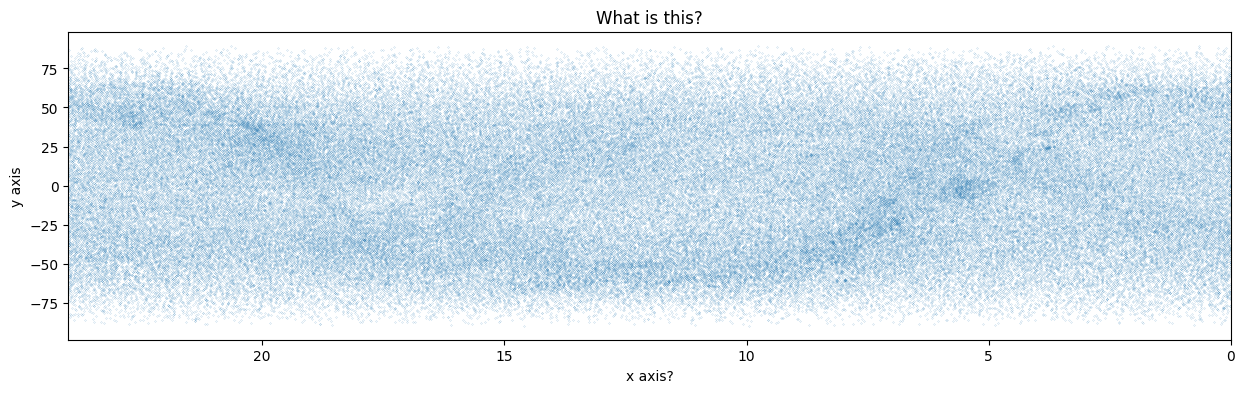

In [ ]:
fig = plt.figure(figsize=(15, 4))
plt.scatter(data['ra'],data['dec'], s=0.01)
plt.xlim(24, 0)
plt.title("What is this?")
plt.xlabel("x axis?")
plt.ylabel("y axis");

Text(0.5, 0, 'Log T (log K)')

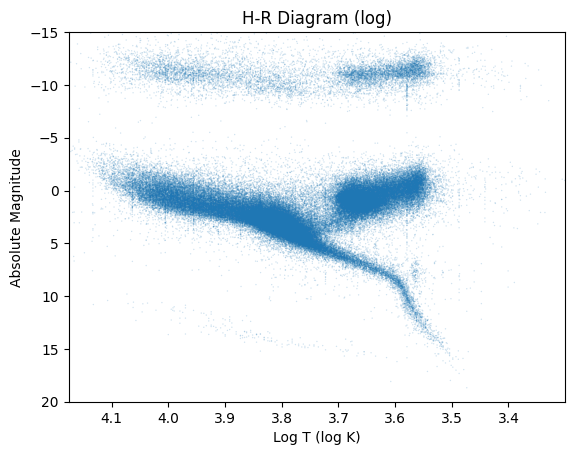

In [ ]:
# format the points on the plot
transparency = 0.2
size = 1

# draws a scatter plot
plt.scatter(np.log10(data.temp), data.absmag, s=size, edgecolors='none', alpha=transparency)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("H-R Diagram (log)")
plt.ylabel("Absolute Magnitude")
plt.xlabel("Log T (log K)")

In [ ]:
# These are the abbreviations for all the constellations
data['con'].sort_values().unique()

array(['And', 'Ant', 'Aps', 'Aql', 'Aqr', 'Ara', 'Ari', 'Aur', 'Boo',
       'CMa', 'CMi', 'CVn', 'Cae', 'Cam', 'Cap', 'Car', 'Cas', 'Cen',
       'Cep', 'Cet', 'Cha', 'Cir', 'Cnc', 'Col', 'Com', 'CrA', 'CrB',
       'Crt', 'Cru', 'Crv', 'Cyg', 'Del', 'Dor', 'Dra', 'Equ', 'Eri',
       'For', 'Gem', 'Gru', 'Her', 'Hor', 'Hya', 'Hyi', 'Ind', 'LMi',
       'Lac', 'Leo', 'Lep', 'Lib', 'Lup', 'Lyn', 'Lyr', 'Men', 'Mic',
       'Mon', 'Mus', 'Nor', 'Oct', 'Oph', 'Ori', 'Pav', 'Peg', 'Per',
       'Phe', 'Pic', 'PsA', 'Psc', 'Pup', 'Pyx', 'Ret', 'Scl', 'Sco',
       'Sct', 'Ser', 'Sex', 'Sge', 'Sgr', 'Tau', 'Tel', 'TrA', 'Tri',
       'Tuc', 'UMa', 'UMi', 'Vel', 'Vir', 'Vol', 'Vul', nan], dtype=object)

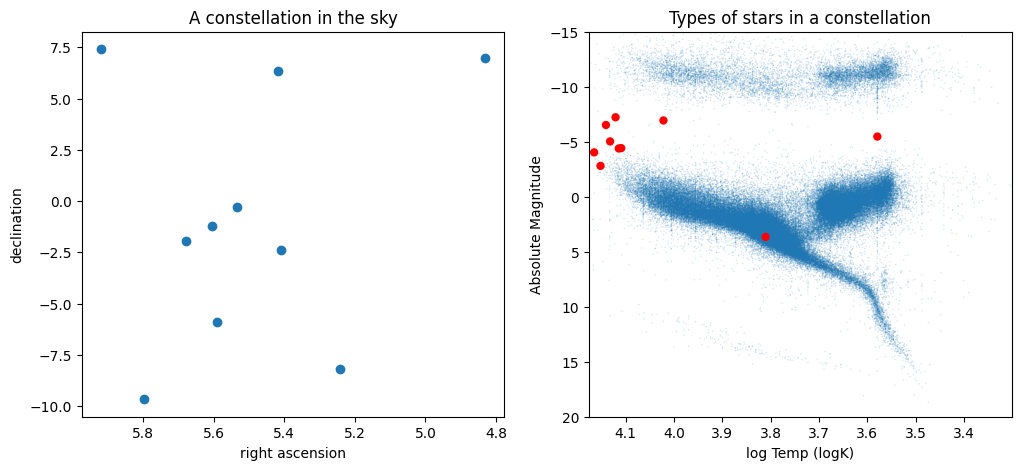

In [ ]:
# This picks a constellation to plot
constellation = data.query('con == "Ori"') # Ori is short for Orion

plt.close('all')
fig = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

# This plots where the constellation's 10 brightest stars are in the sky
constellation = constellation.sort_values('mag').head(10)
plt.scatter(constellation['ra'],constellation['dec'])
plt.gca().invert_xaxis()
plt.title("A constellation in the sky")
plt.xlabel("right ascension")
plt.ylabel("declination")

plt.subplot(1, 2, 2)
# format the points on the plot
transparency = 0.2
size = 1

# plots the constellation's stars in red over the big plot of all stars
plt.scatter(np.log10(data['temp']), data['absmag'], s=size, edgecolors='none', alpha=transparency)
logtemps = np.log10(constellation['temp'])
#plt.scatter(constellation['temp'], constellation['absmag'], color='red', edgecolors='none')
plt.scatter(logtemps, constellation['absmag'], color='red', edgecolors='none')
#plt.xlim(2000,15000)
plt.xlim(np.log10(15000),np.log10(2000))
plt.ylim(20,-15)
plt.title("Types of stars in a constellation")
plt.ylabel("Absolute Magnitude")
plt.xlabel("log Temp (logK)")
plt.show()

![img](https://openstax.org/apps/archive/20250116.201611/resources/dd3b626194347b820b300c0437928fdb31869efd)

http://www.astronexus.com/projects/hyg
https://github.com/astronexus/HYG-Database/tree/main


https://github.com/astronexus/ATHYG-Database/tree/main - 2million records

https://www.youtube.com/watch?v=8iSy3w5LQwo